In [1]:
from os import listdir
from os.path import isfile, join
from utils.tools import *

In [11]:
def full_graphing(path):
    bad_mpts = []
    allowed_graphs = []
    if type(path) == str:
        content = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
        for i in content:
            try:
                print(i, ' was a permissible file')
                allowed_graphs.append(i)
                ex_mpt = mpt_data(path,[i])
                masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                masked_mpt.set_new_gph_dims(30,30)
                masked_mpt.mpt_plot()
            except ValueError:
                bad_mpts.append(i)
                print(i, ' was a bad file')
    
def list_graphing(path, lst):
    for i in lst:
        try:
            print(i, ' was a permissible file')
            ex_mpt = mpt_data(path,[i])
            masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
            masked_mpt.set_new_gph_dims(30,30)
            masked_mpt.mpt_plot()
        except ValueError:
            bad_mpts.append(i)
            print(i, ' was a bad file')

In [12]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
good_graphs = ['DE_49_7_30.mpt', 'DE_49_8_30.mpt', 'DE_49_9_30.mpt']
#[f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_10_60.mpt  was a permissible file
DE_40_11_60.mpt  was a permissible file
DE_40_12_60.mpt  was a permissible file
DE_40_13_60.mpt  was a permissible file
DE_40_14_60.mpt  was a permissible file
DE_40_14_60.mpt  was a bad file
DE_40_15_60.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_1_30.mpt  was a permissible file
DE_40_2_60.mpt  was a permissible file
DE_40_3_60.mpt  was a permissible file
DE_40_4_60.mpt  was a permissible file
DE_40_5_60.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_40_6_60.mpt  was a permissible file
DE_40_7_60.mpt  was a permissible file
DE_40_8_60.mpt  was a permissible file
DE_40_8_60.mpt  was a bad file
DE_40_9_60.mpt  was a permissible file
DE_49_1_30.mpt  was a permissible file
DE_49_2_30.mpt  was a permissible file
DE_49_2_30.mpt  was a bad file
DE_49_3_30.mpt  was a permissible file
DE_49_3_30.mpt  was a bad file
DE_49_4_30.mpt  was a permissible file
DE_49_4_30.mpt  was a bad file
DE_49_5_30.mpt  was a permissible file


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_49_6_30.mpt  was a permissible file
DE_49_7_30.mpt  was a permissible file
DE_49_8_30.mpt  was a permissible file
DE_49_9_30.mpt  was a permissible file


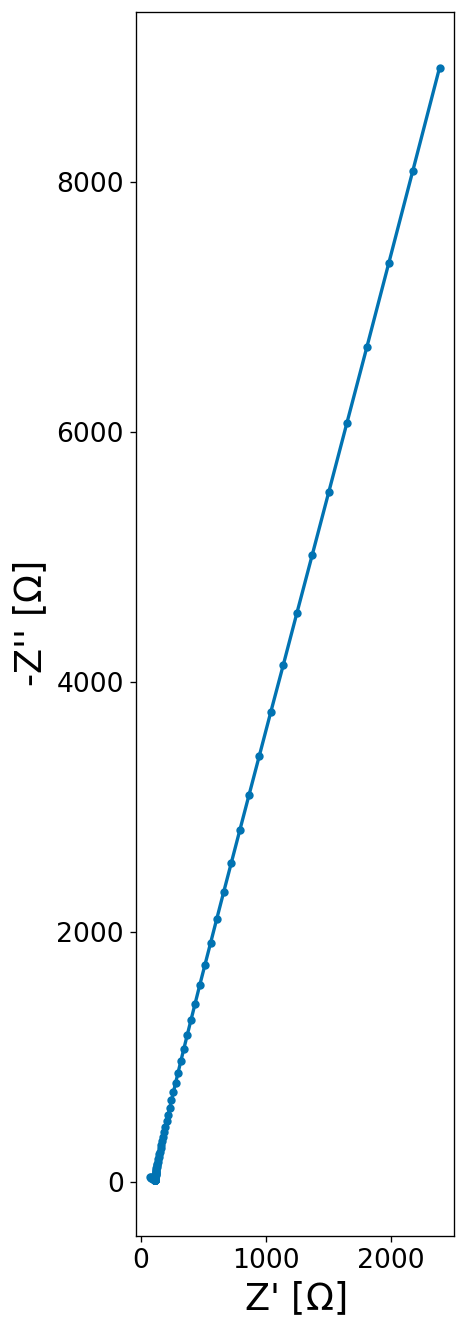

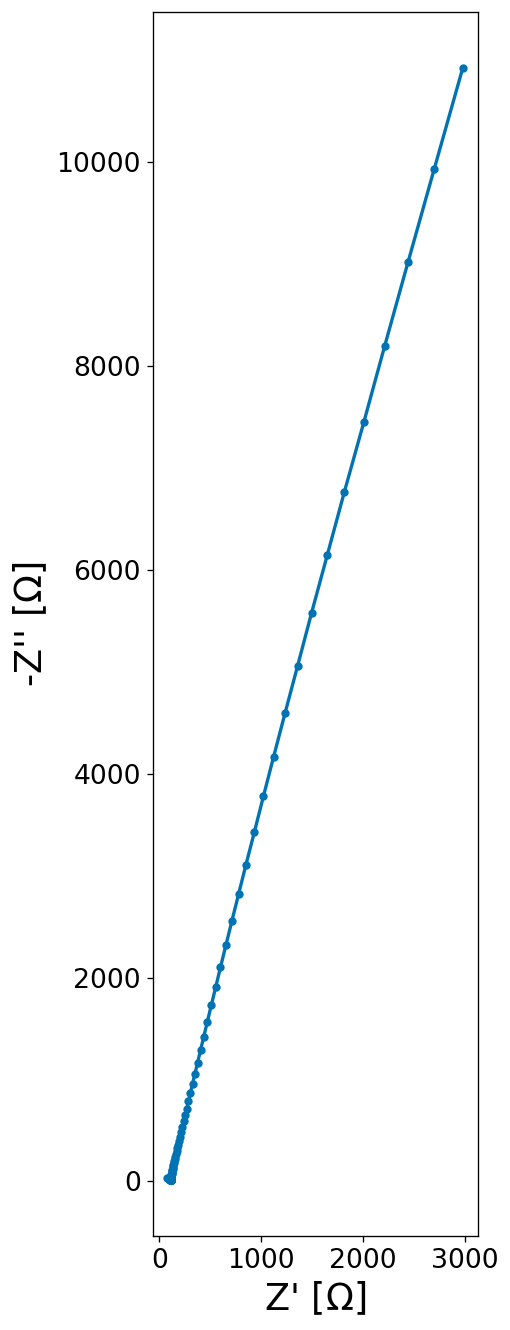

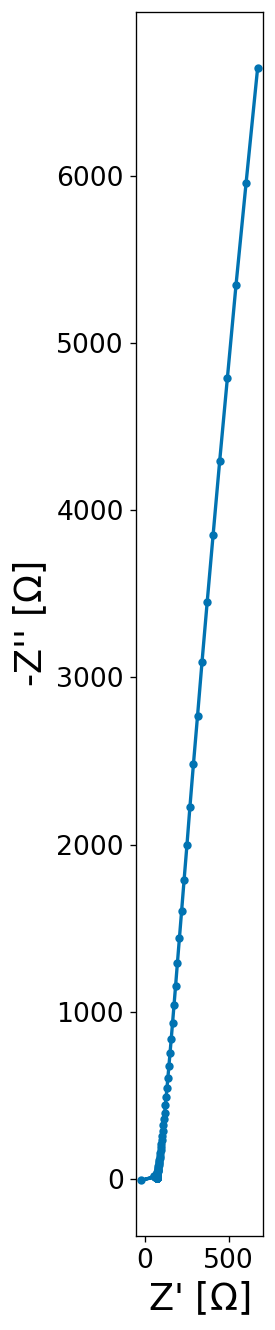

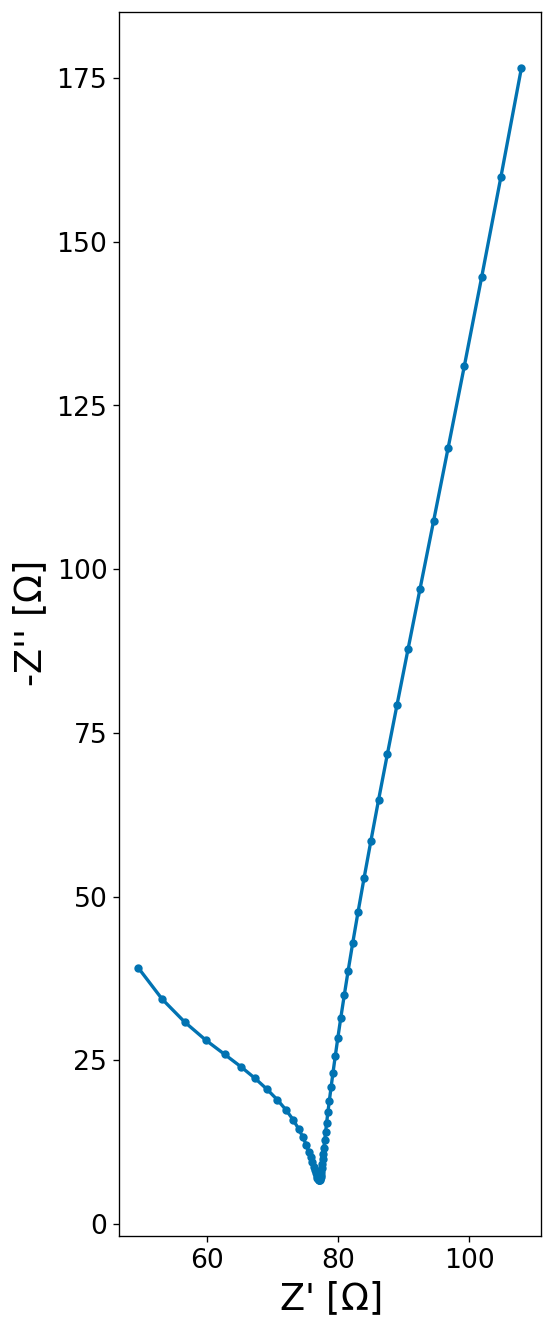

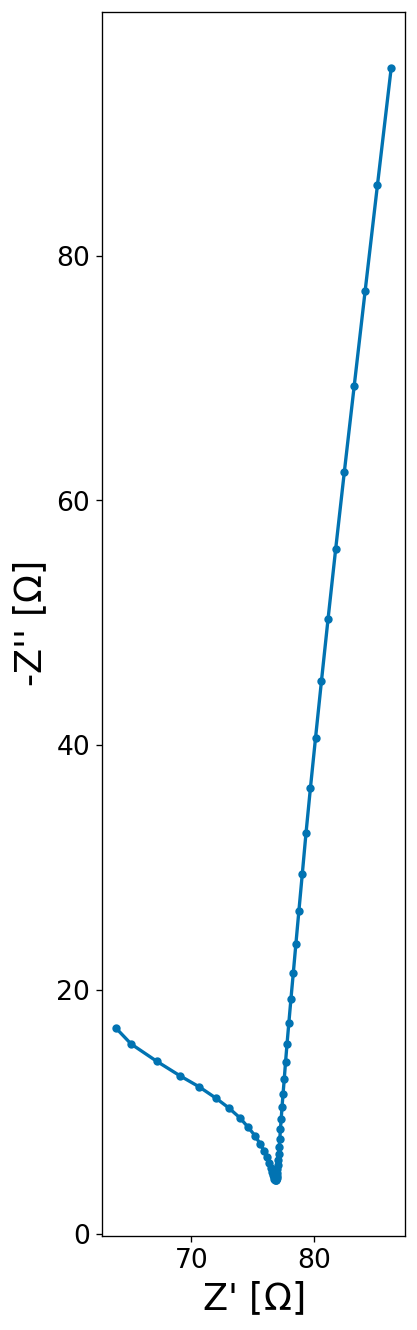

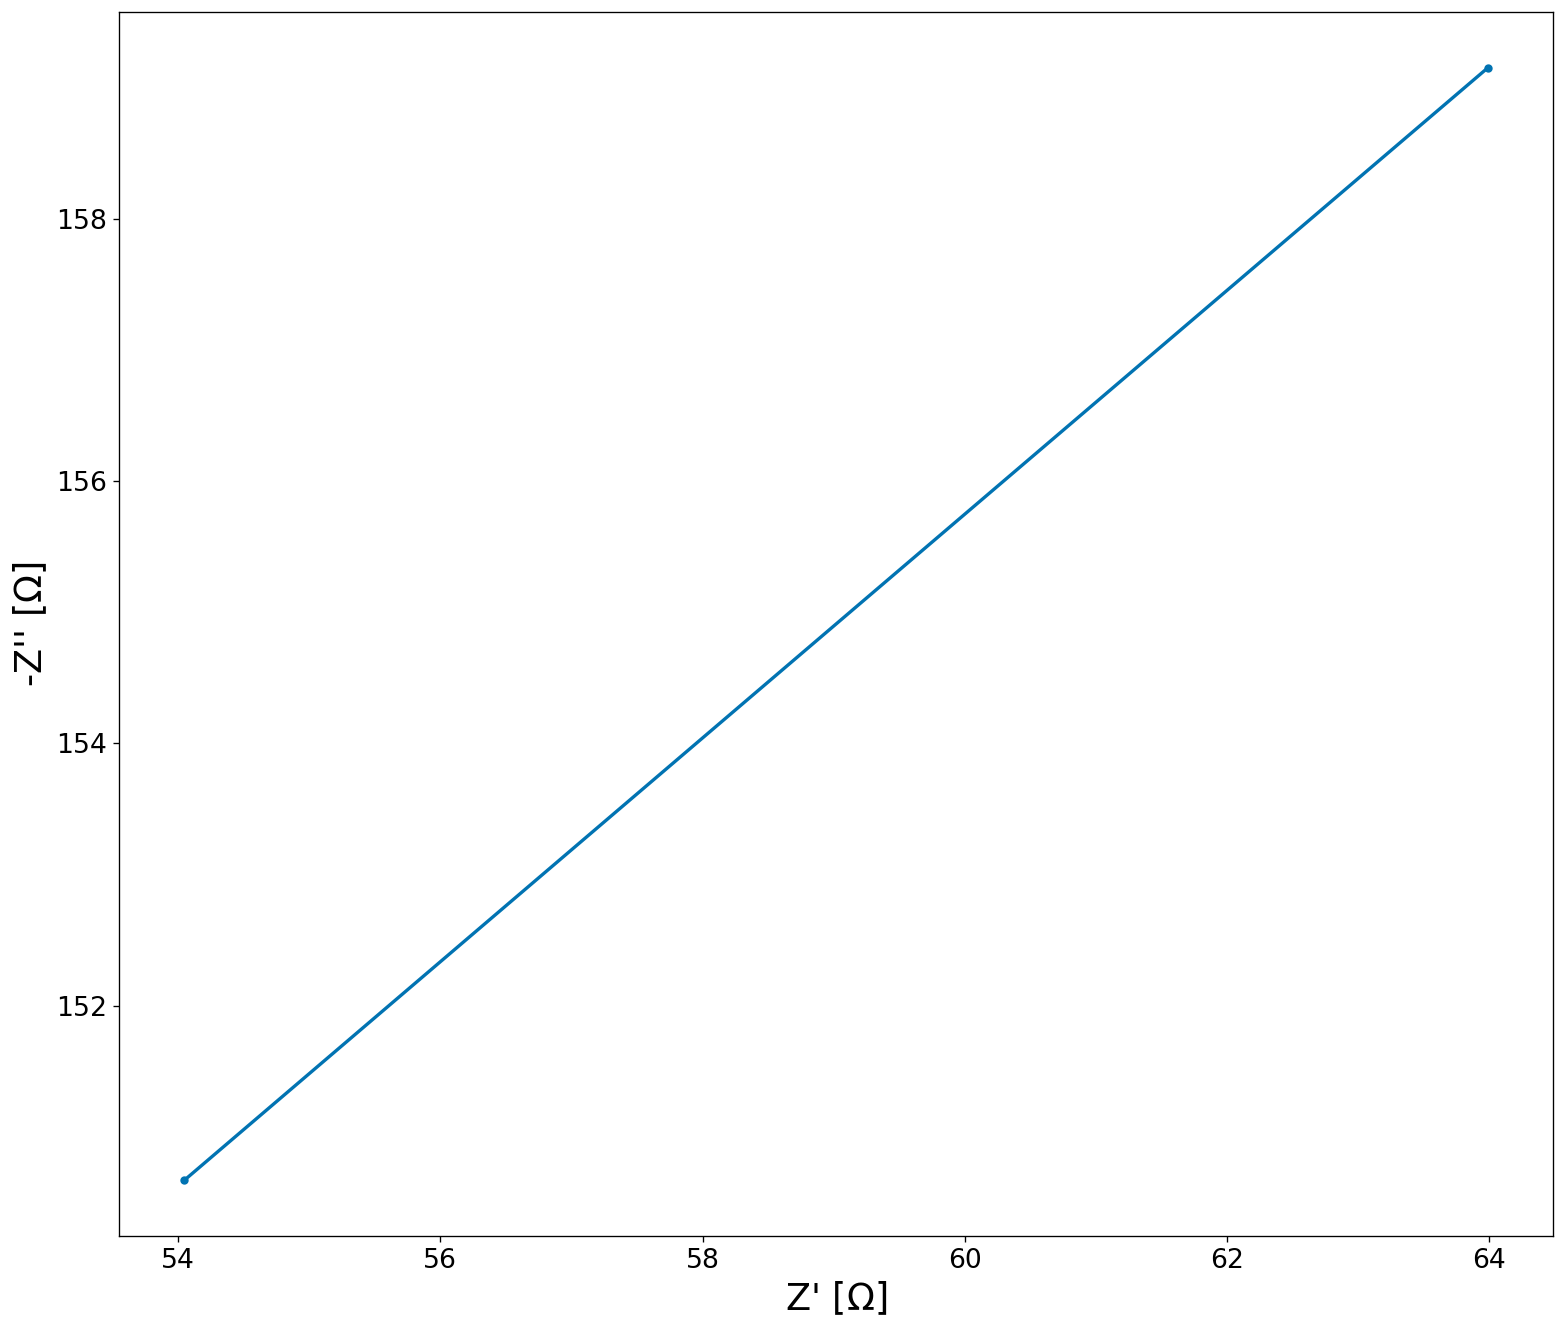

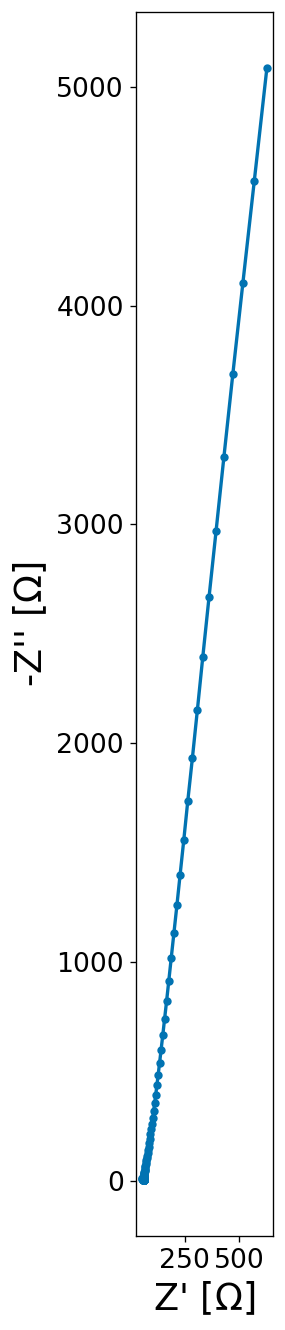

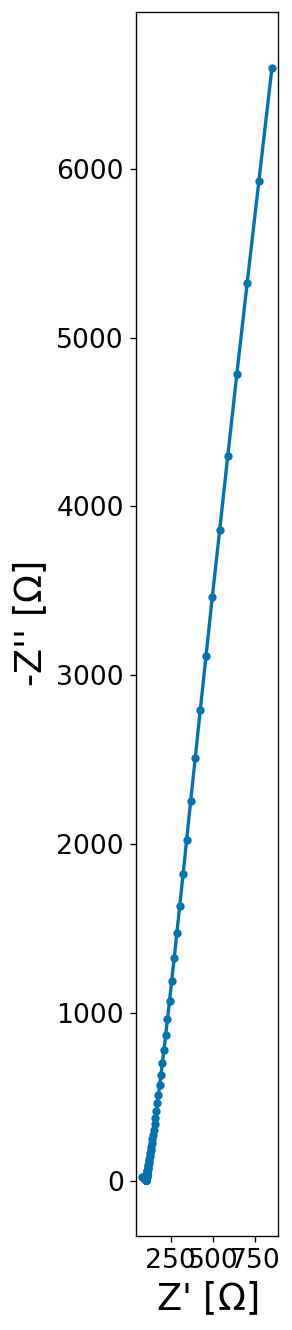

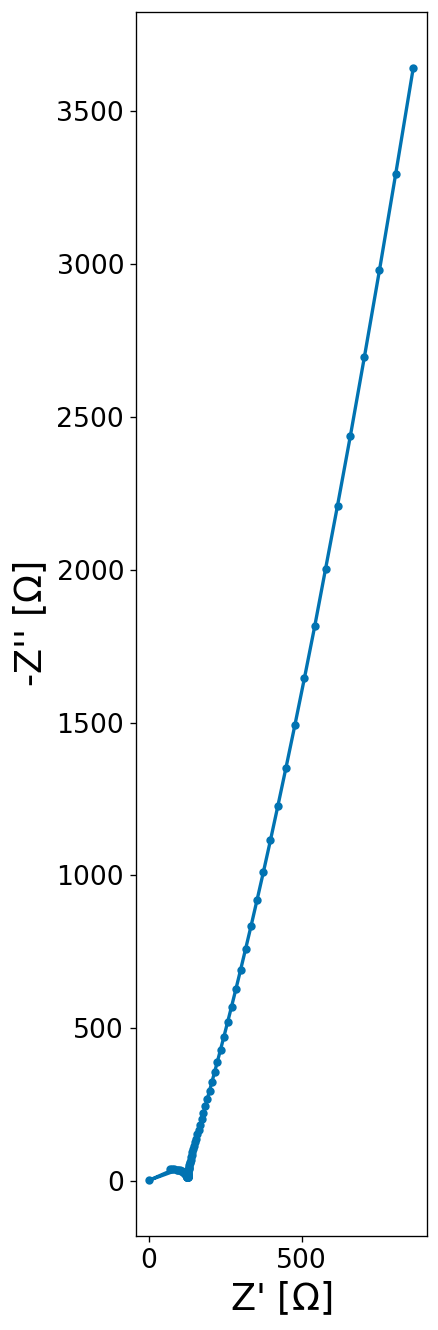

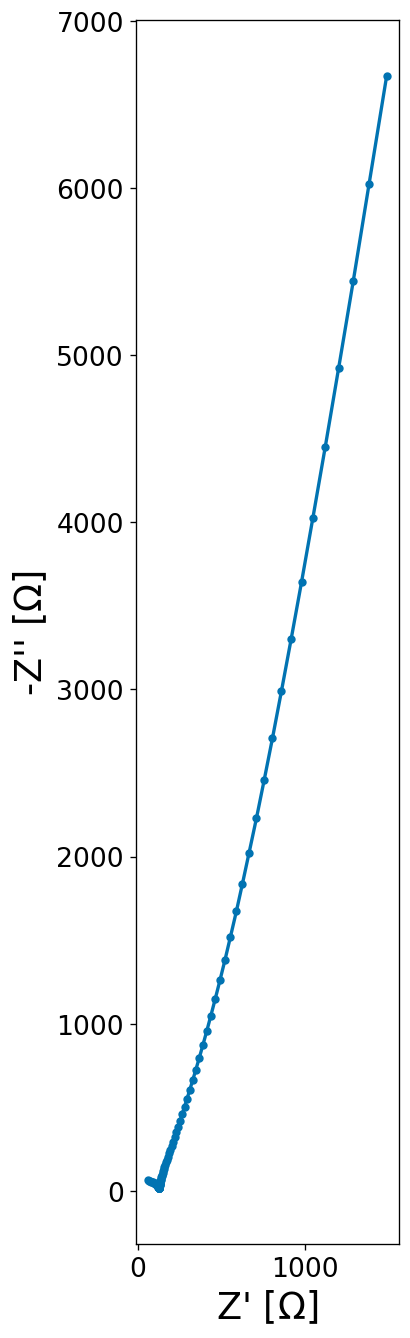

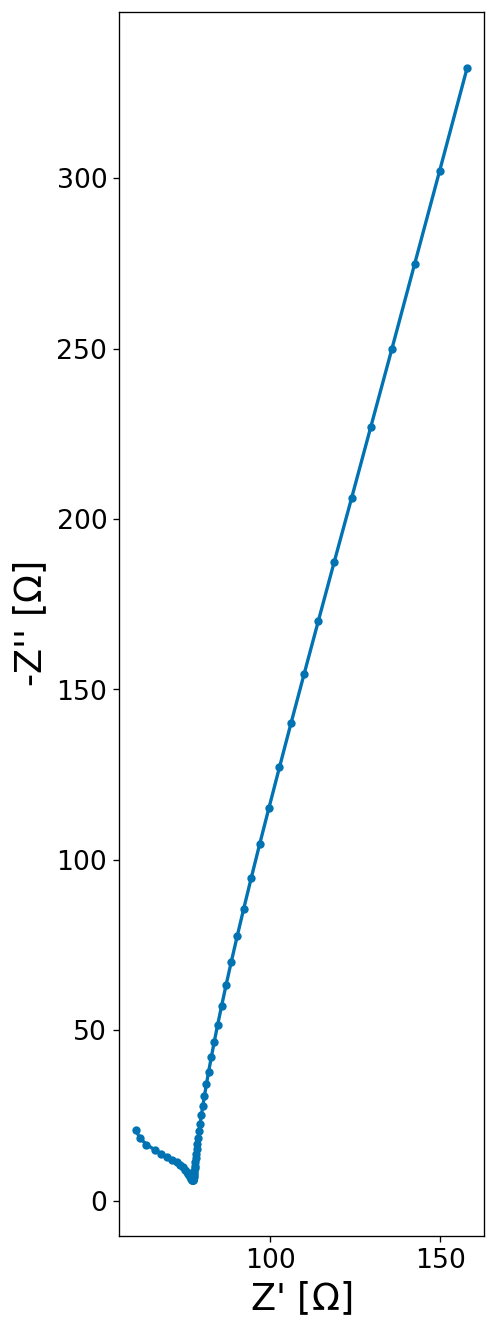

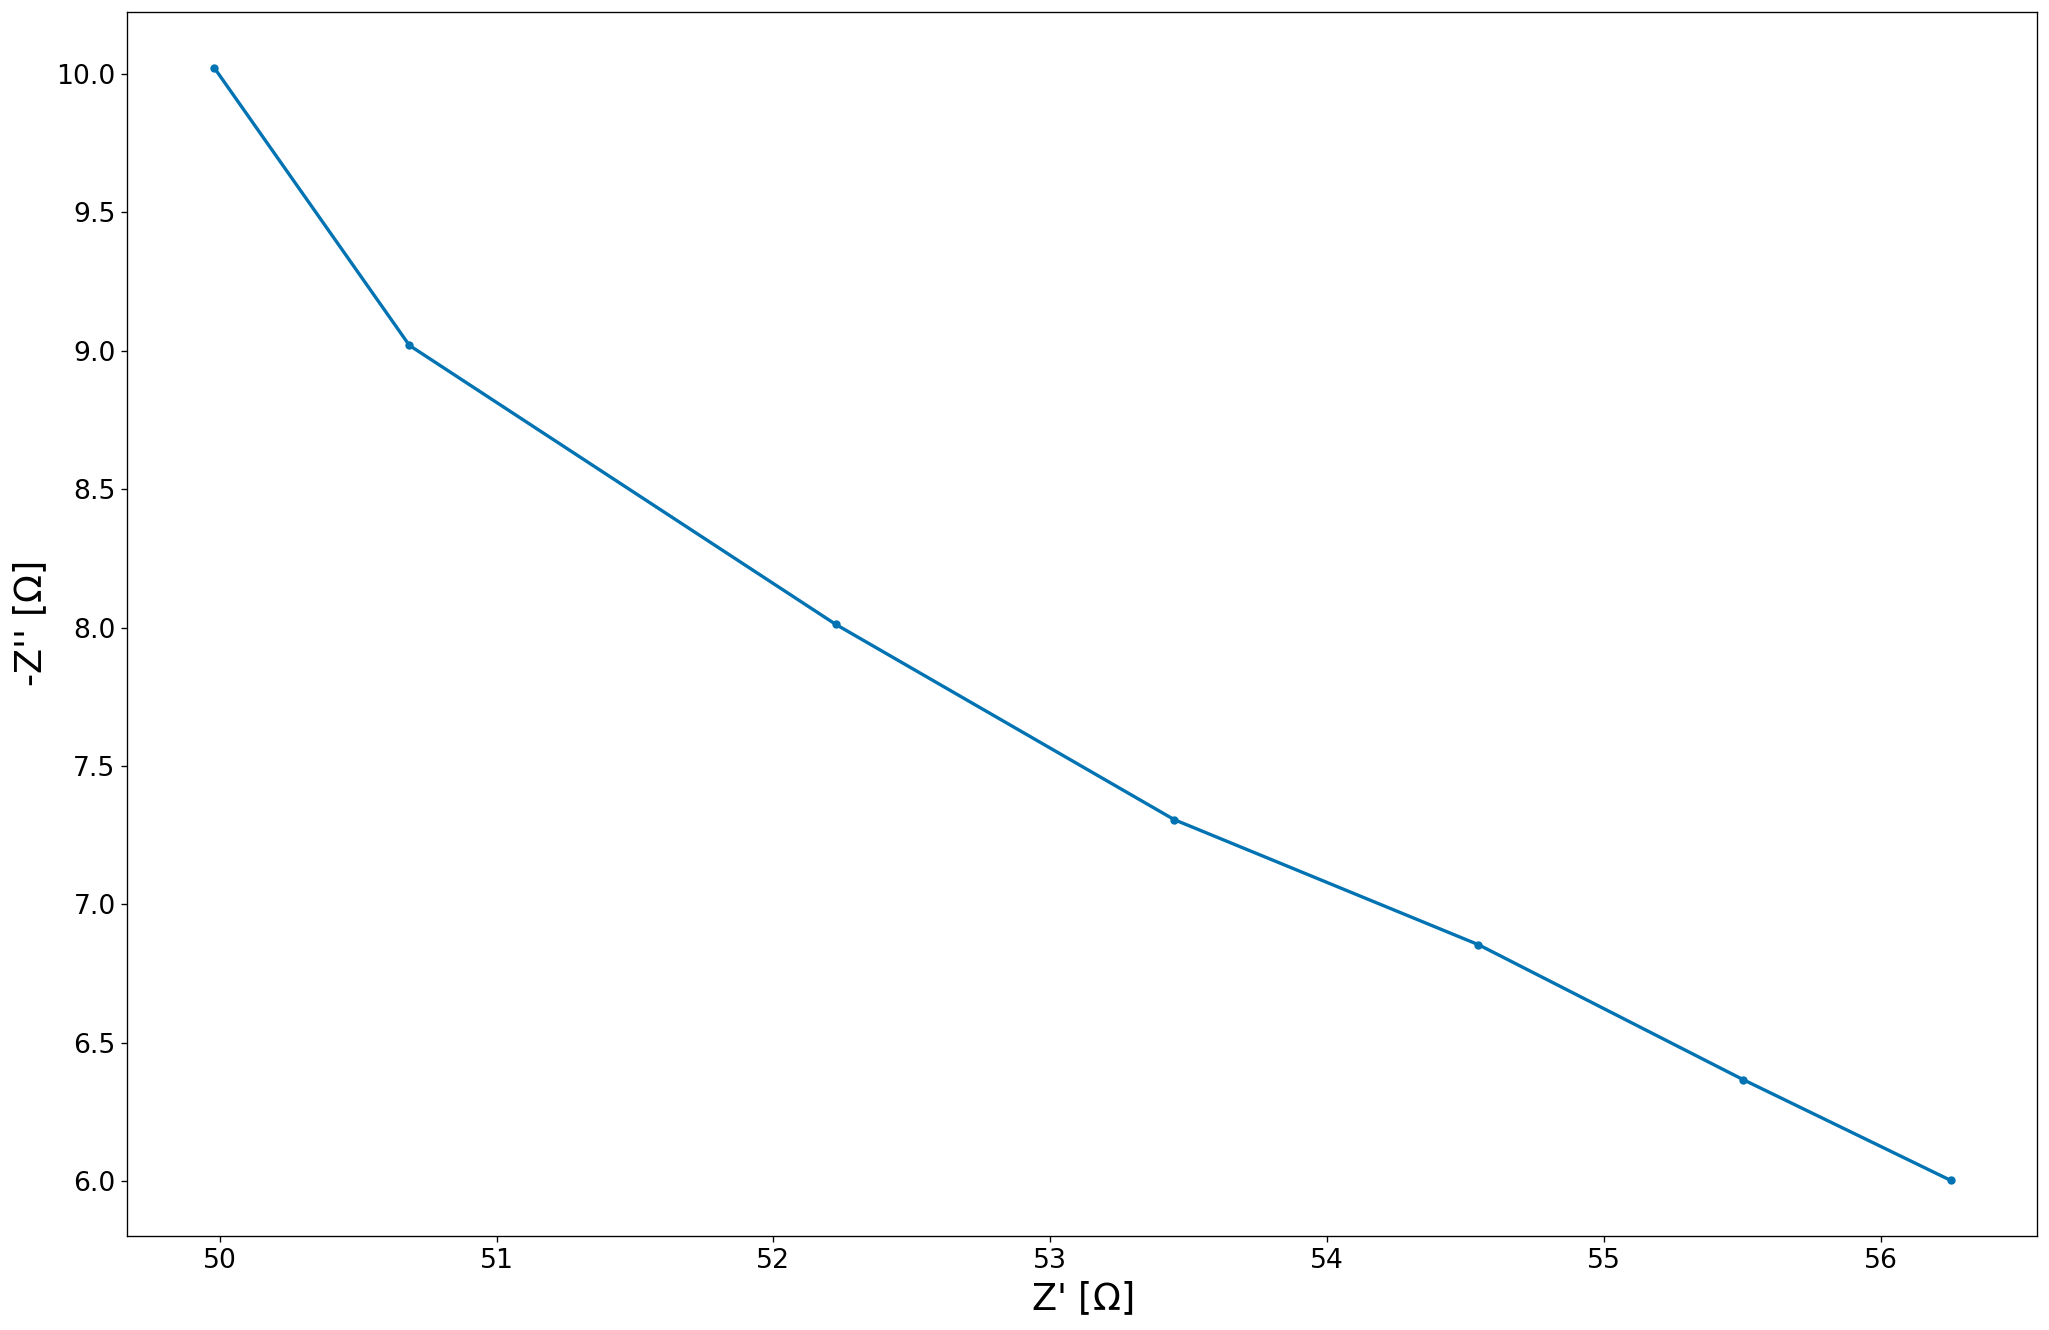

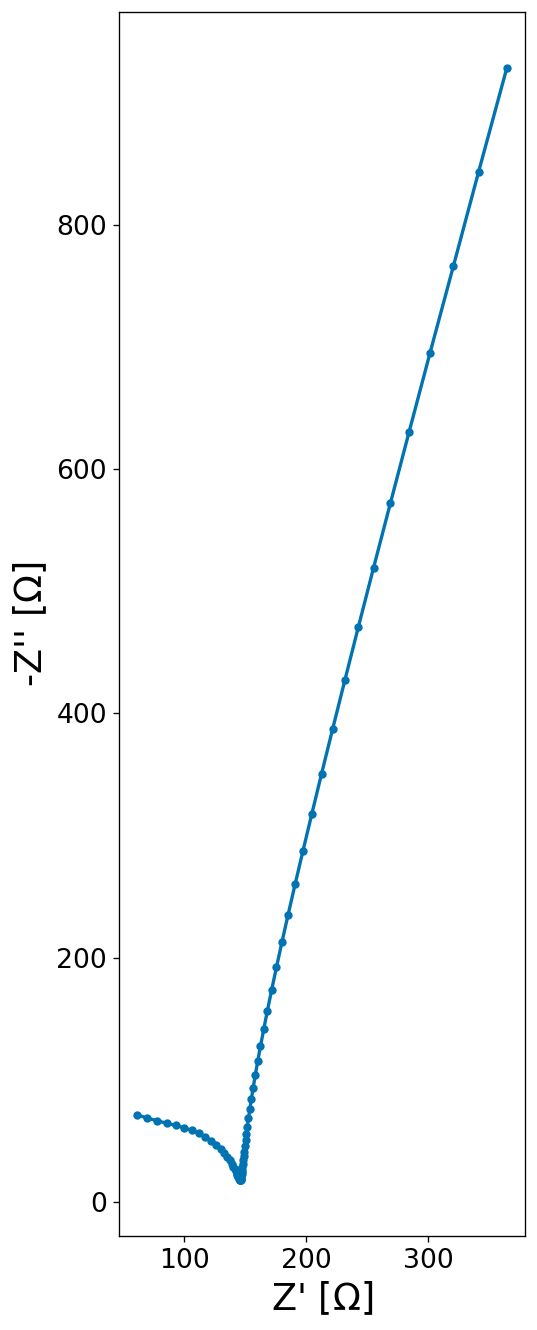

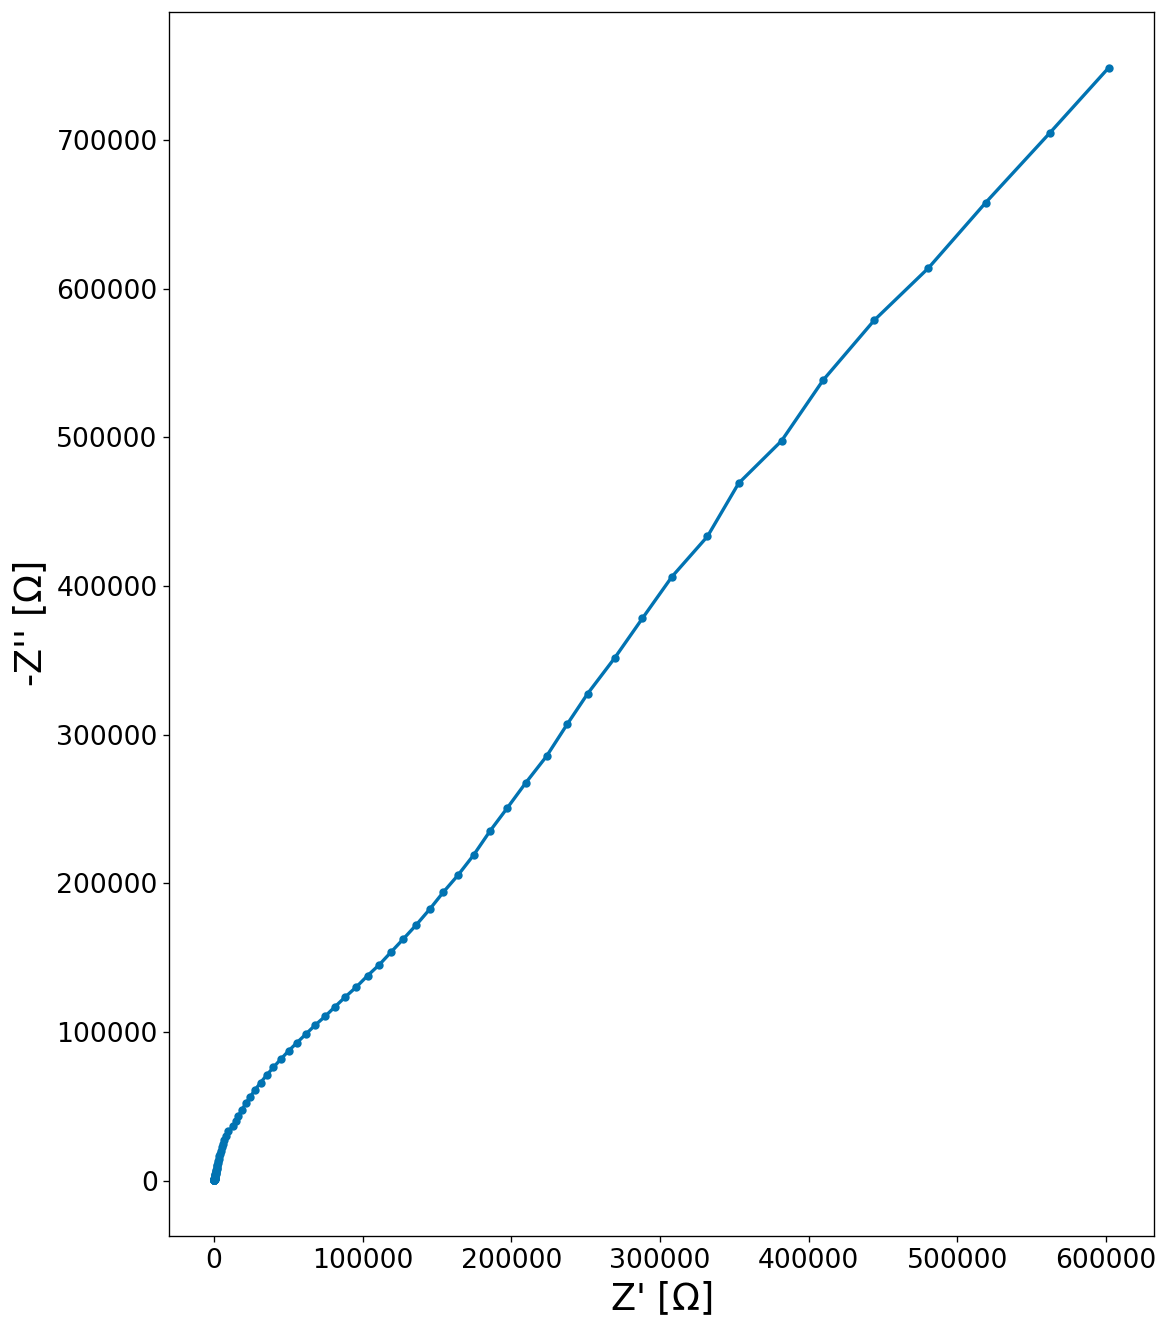

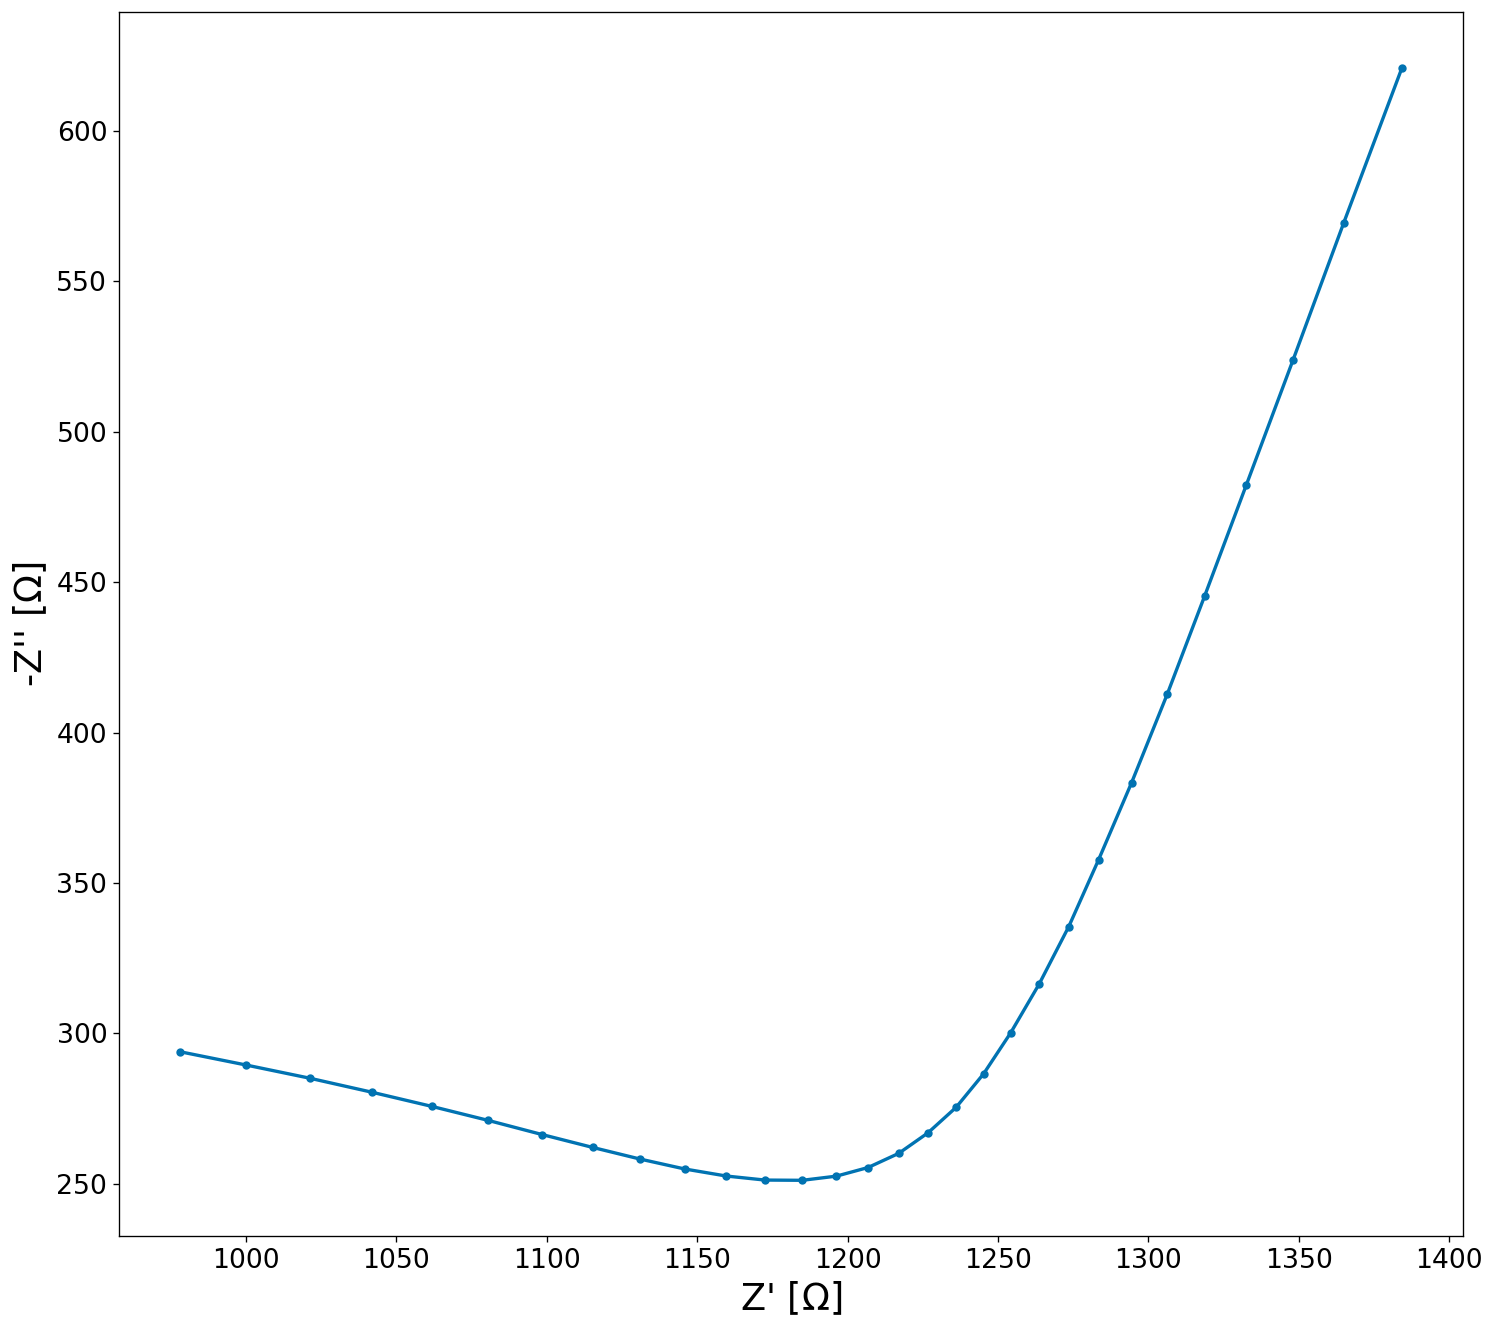

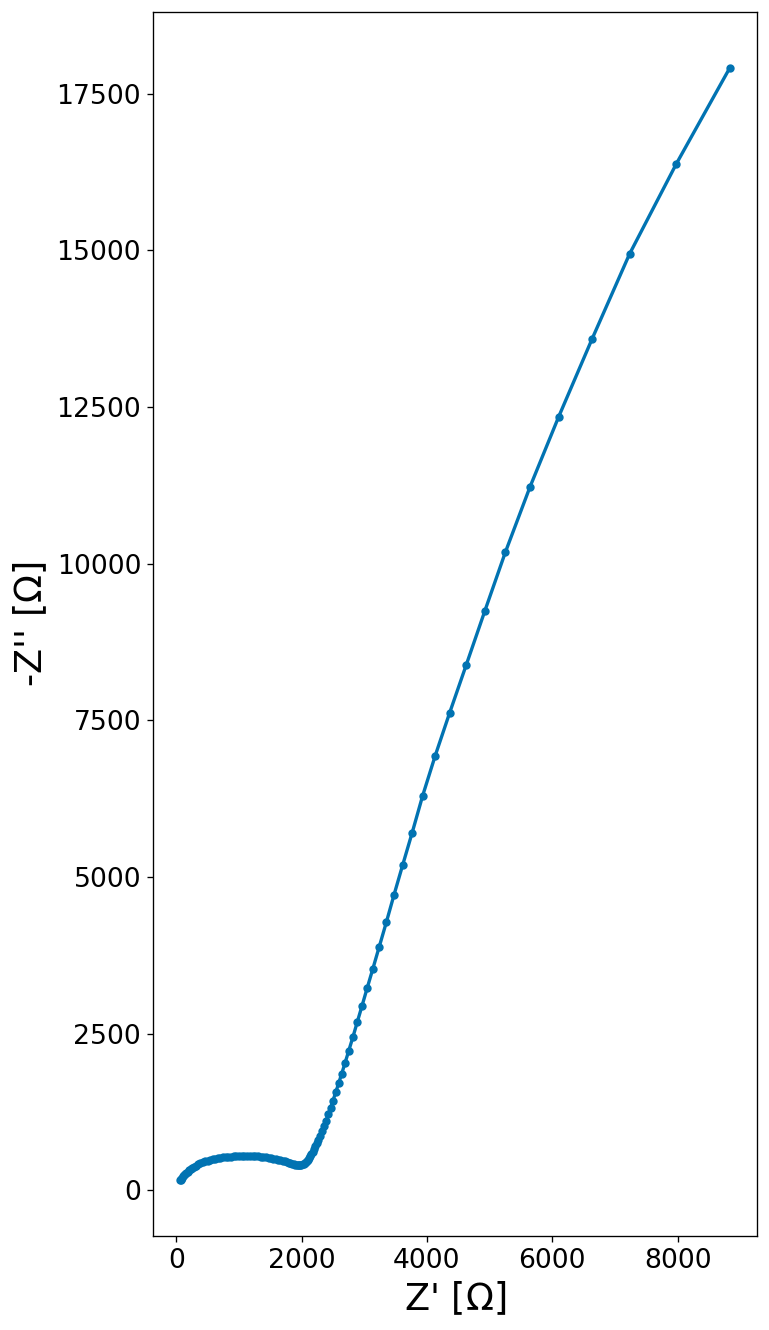

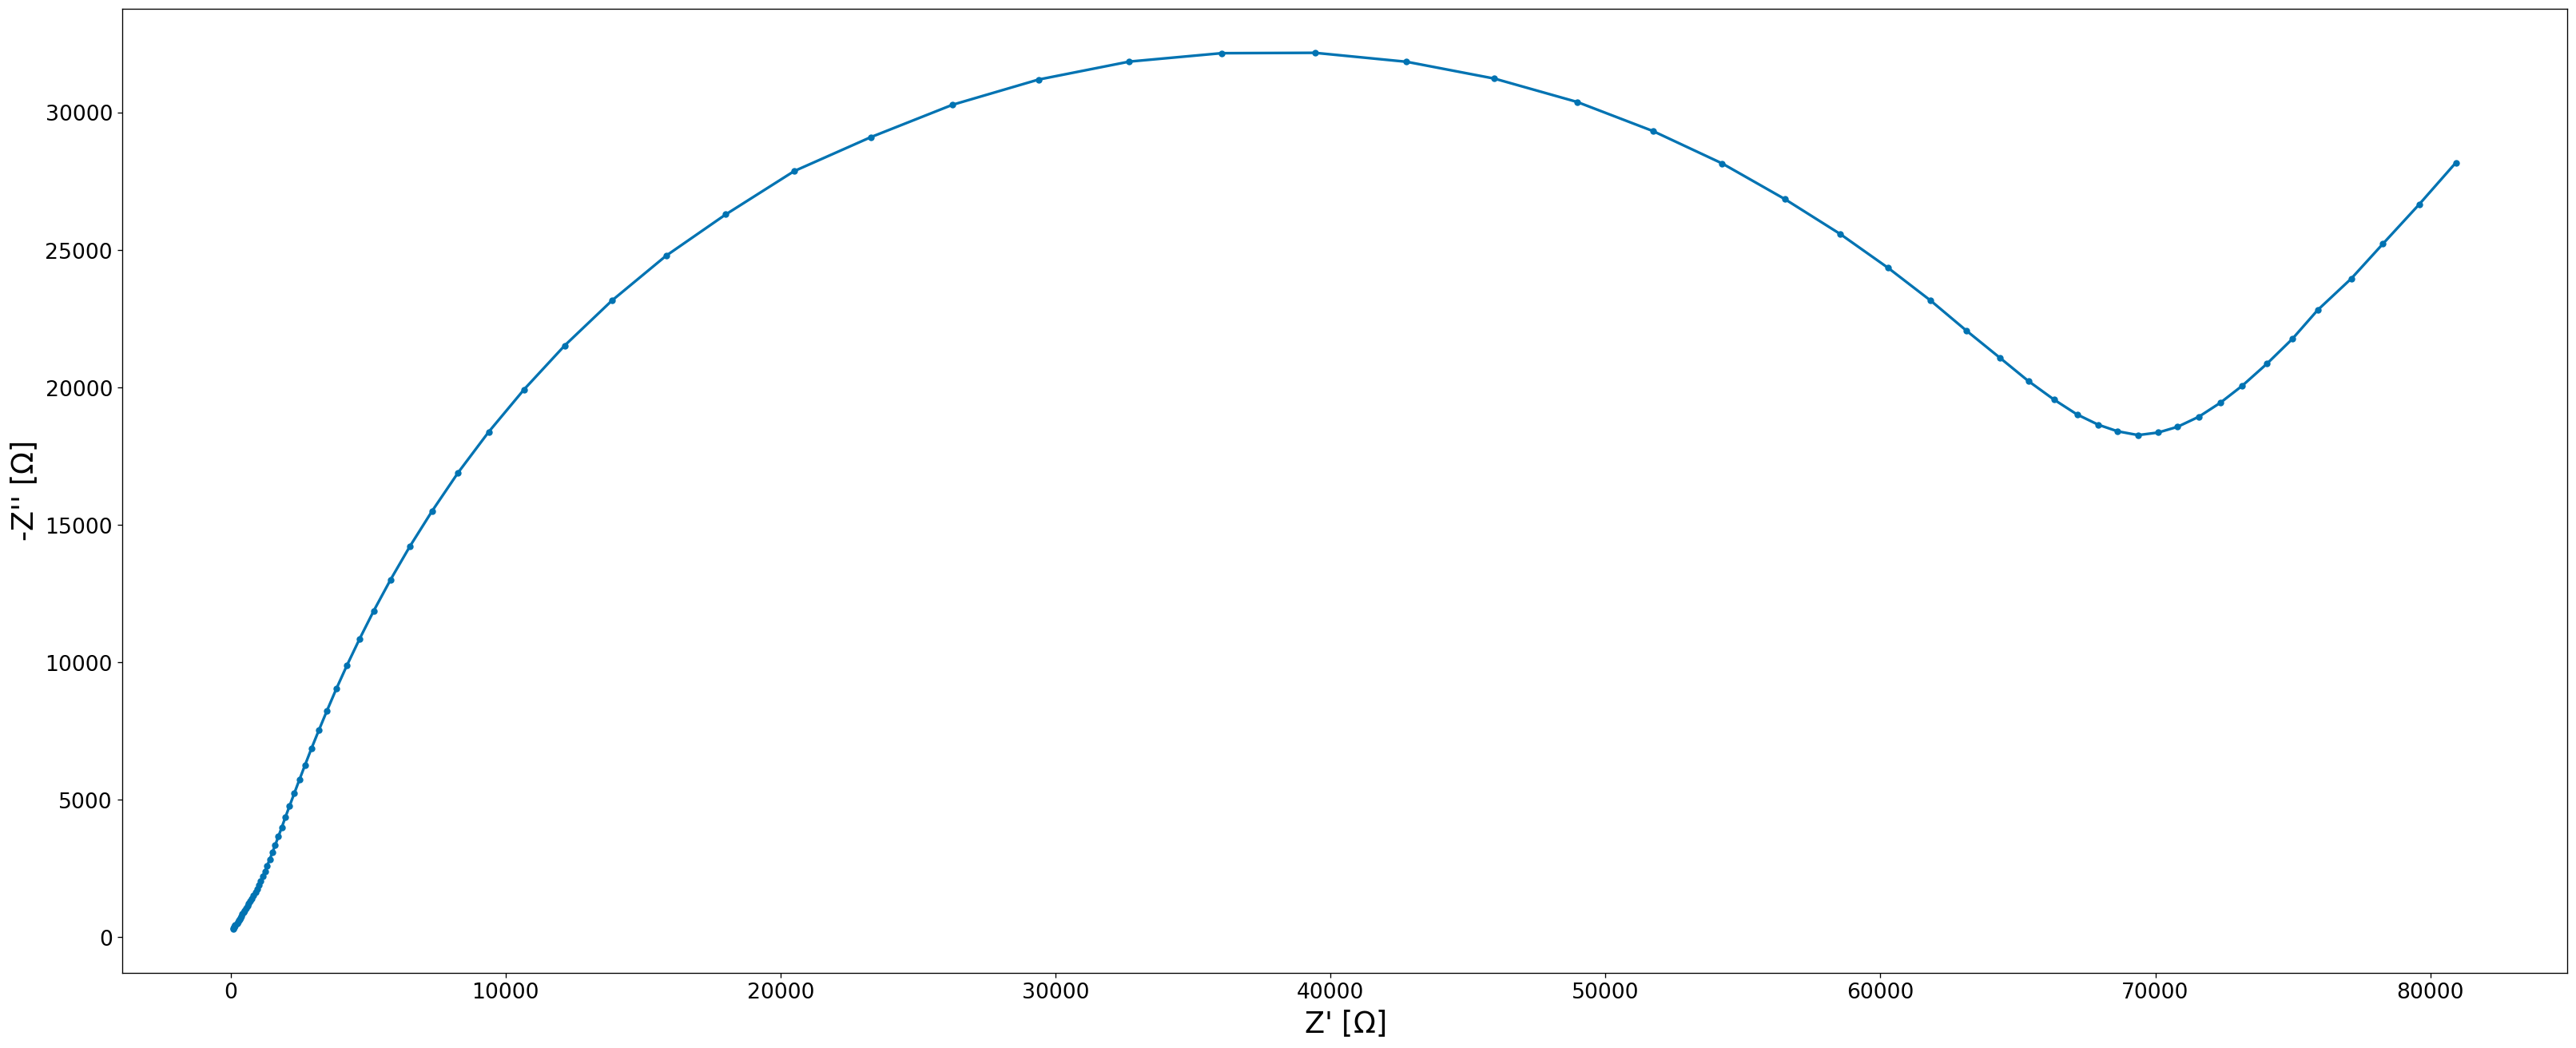

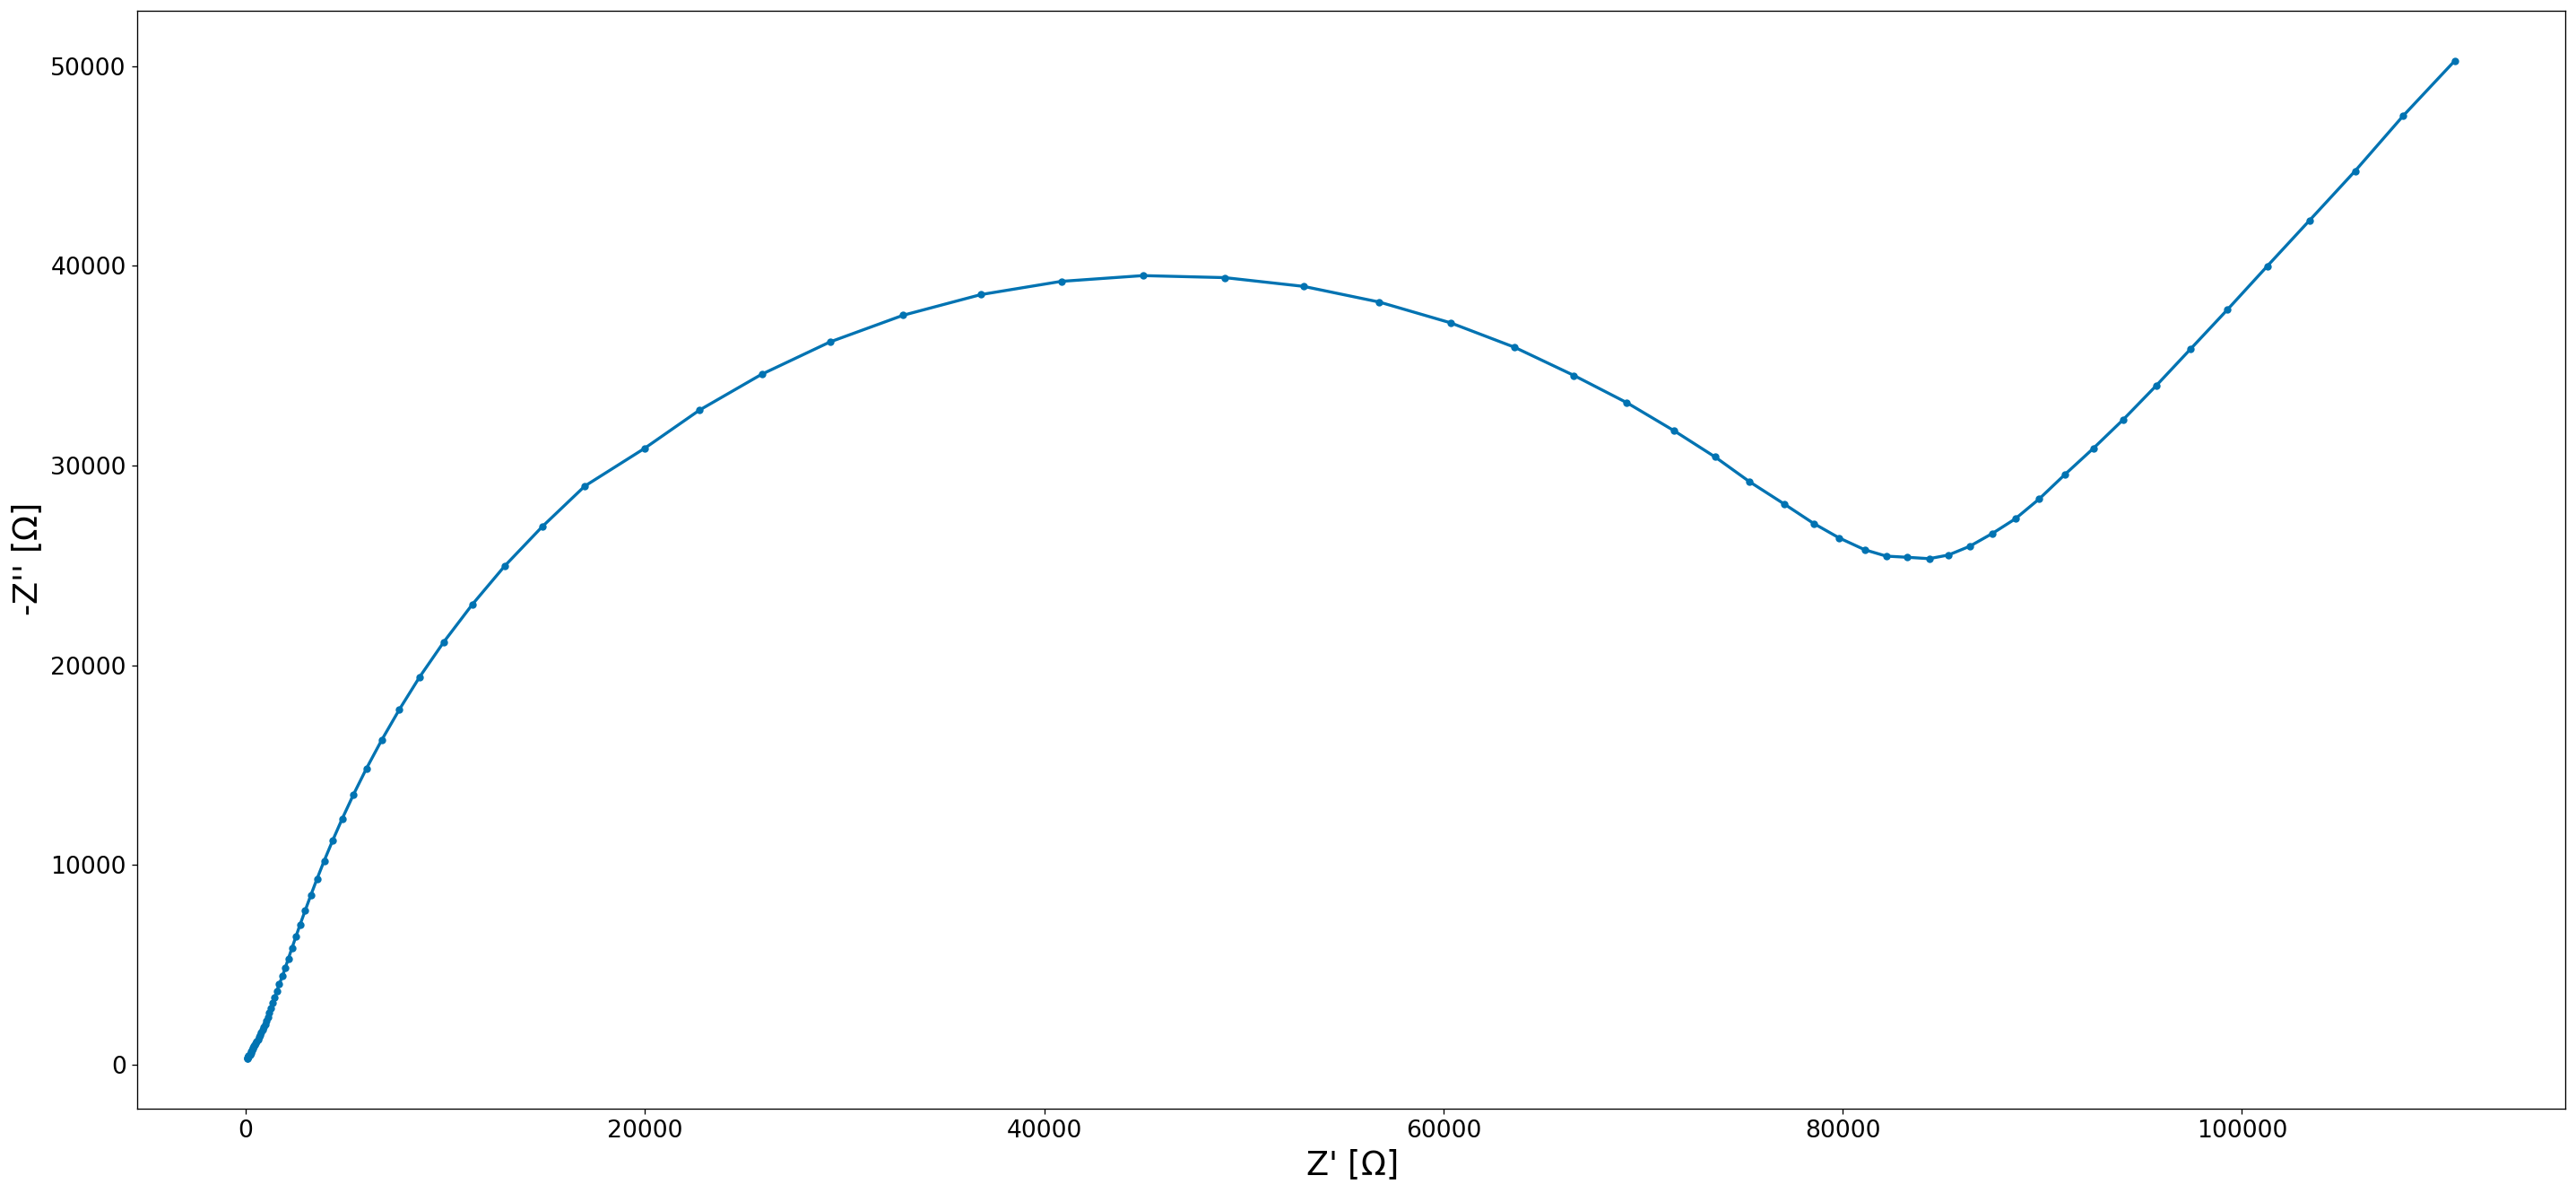

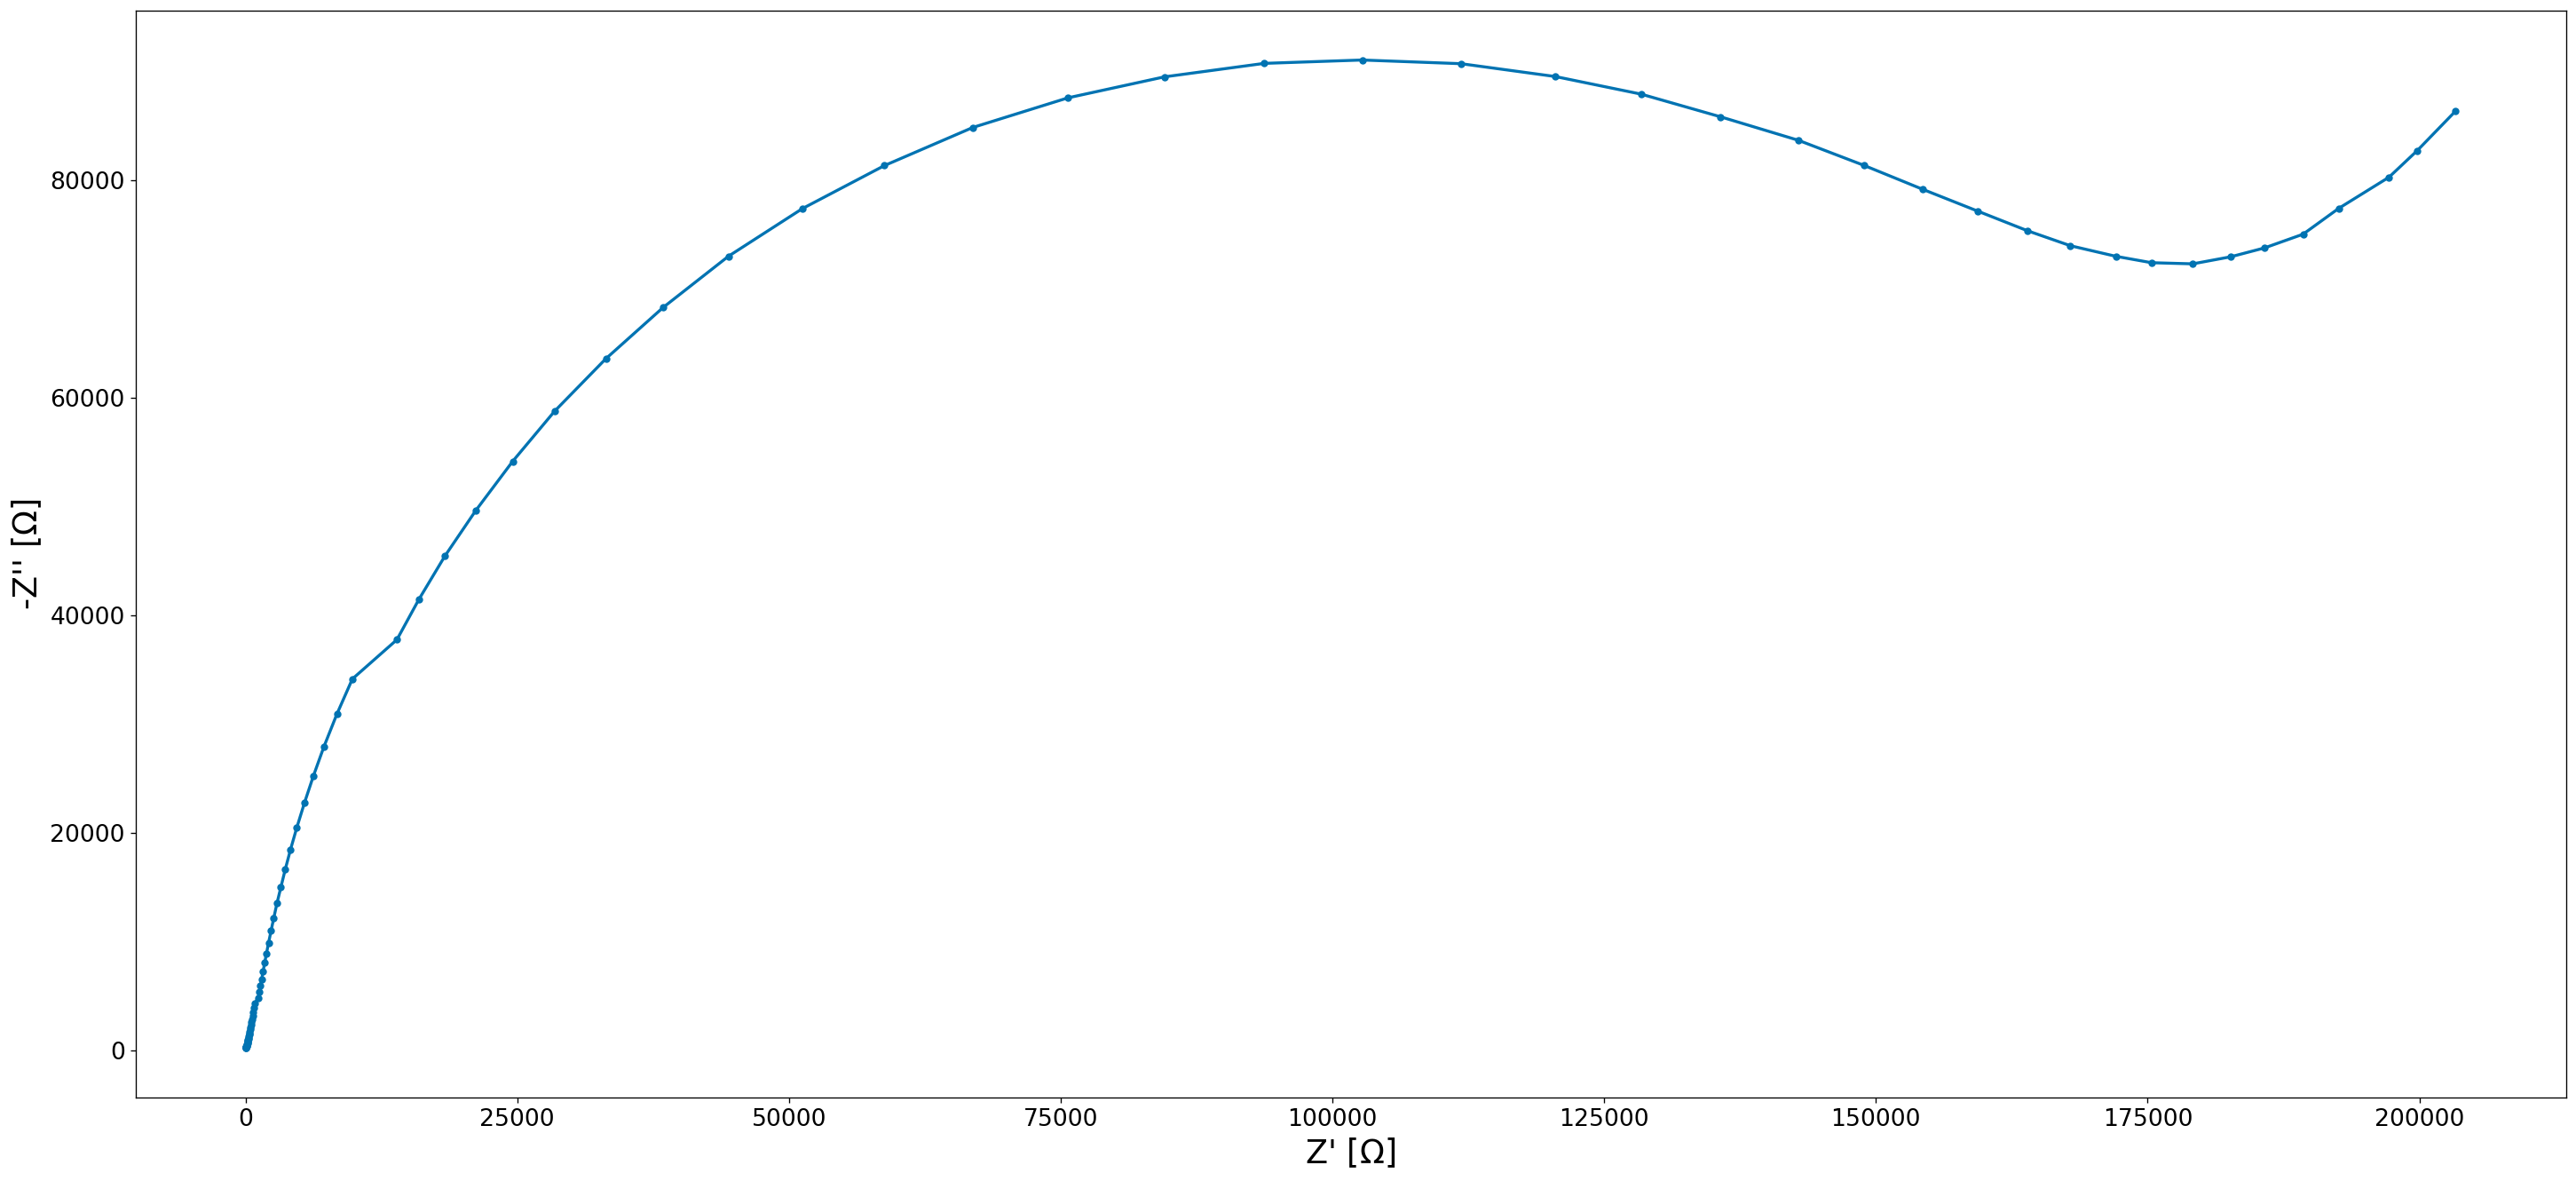

In [13]:
full_graphing(path)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


DE_49_7_30.mpt  was a permissible file
DE_49_8_30.mpt  was a permissible file
DE_49_9_30.mpt  was a permissible file


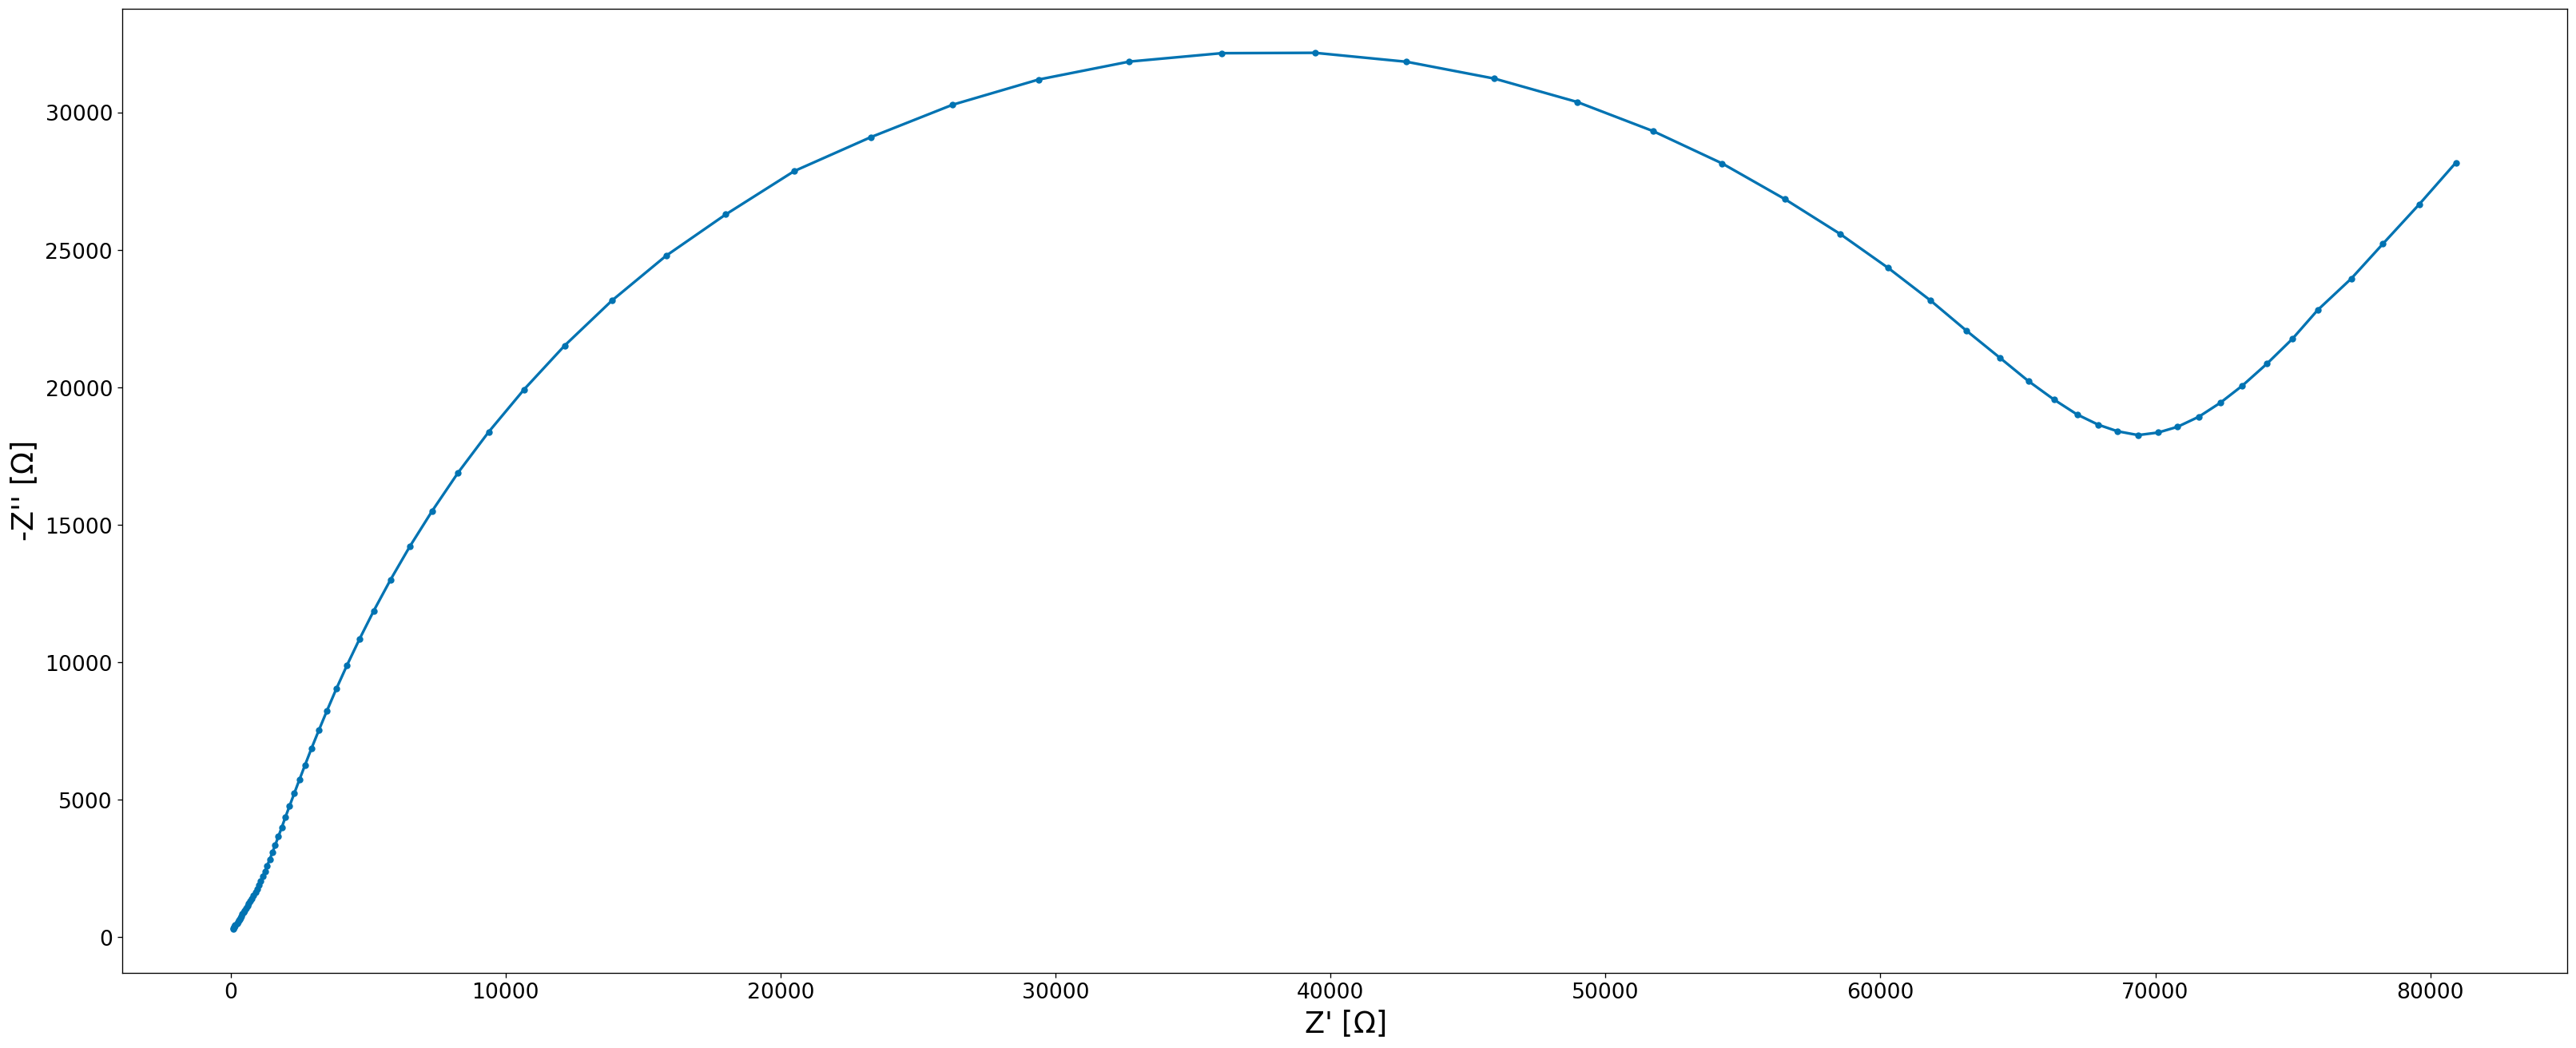

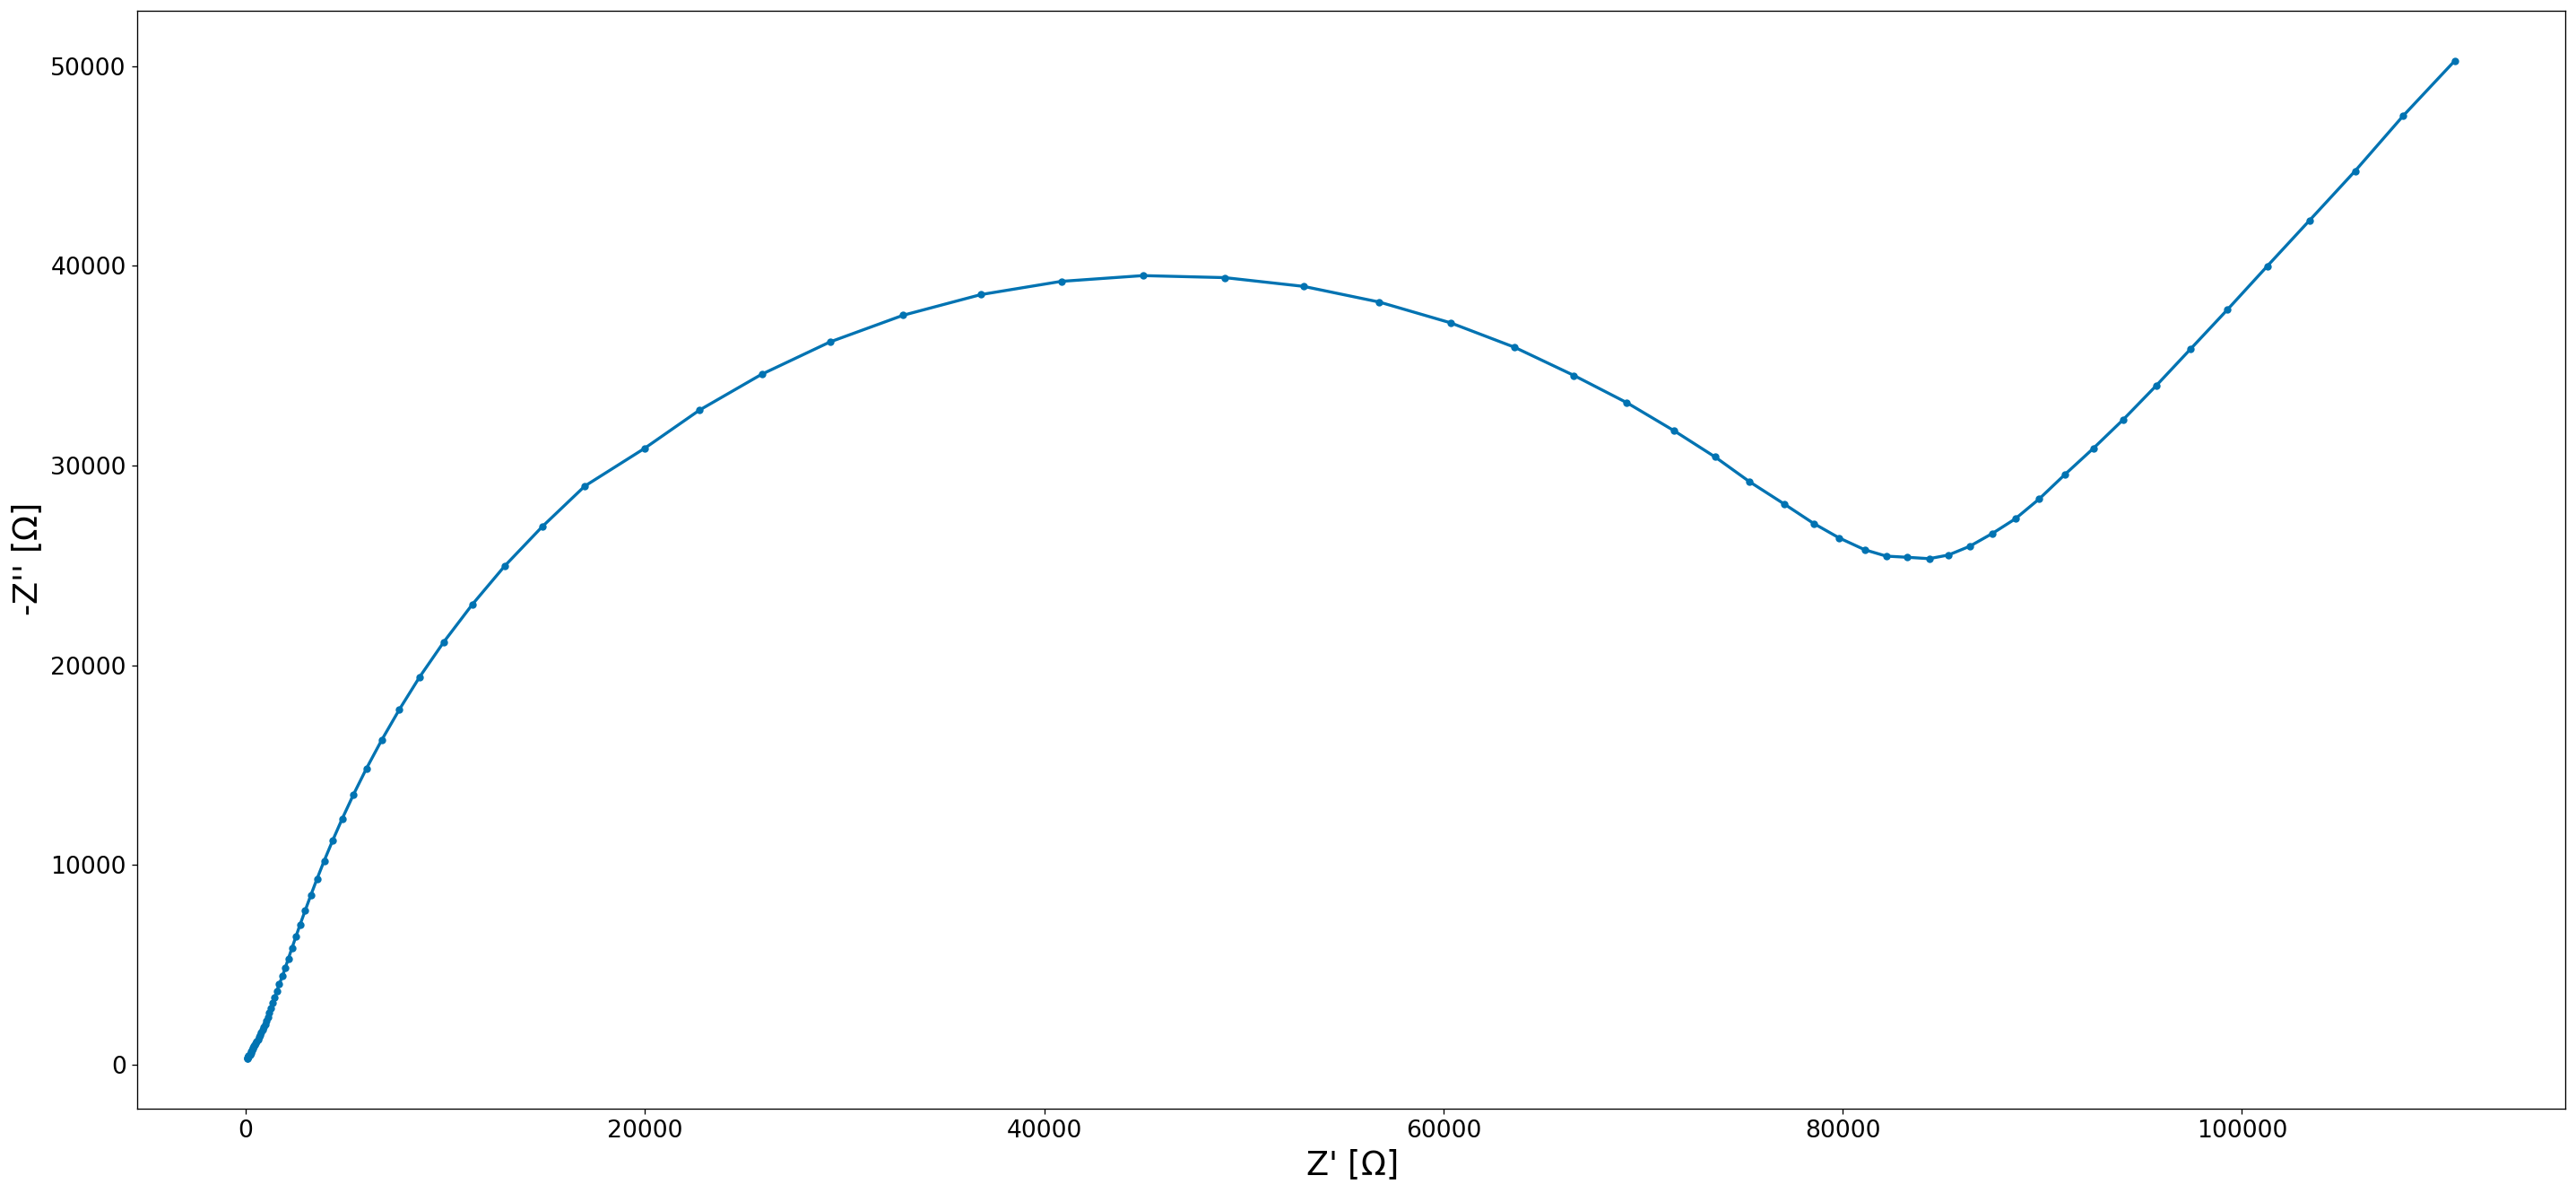

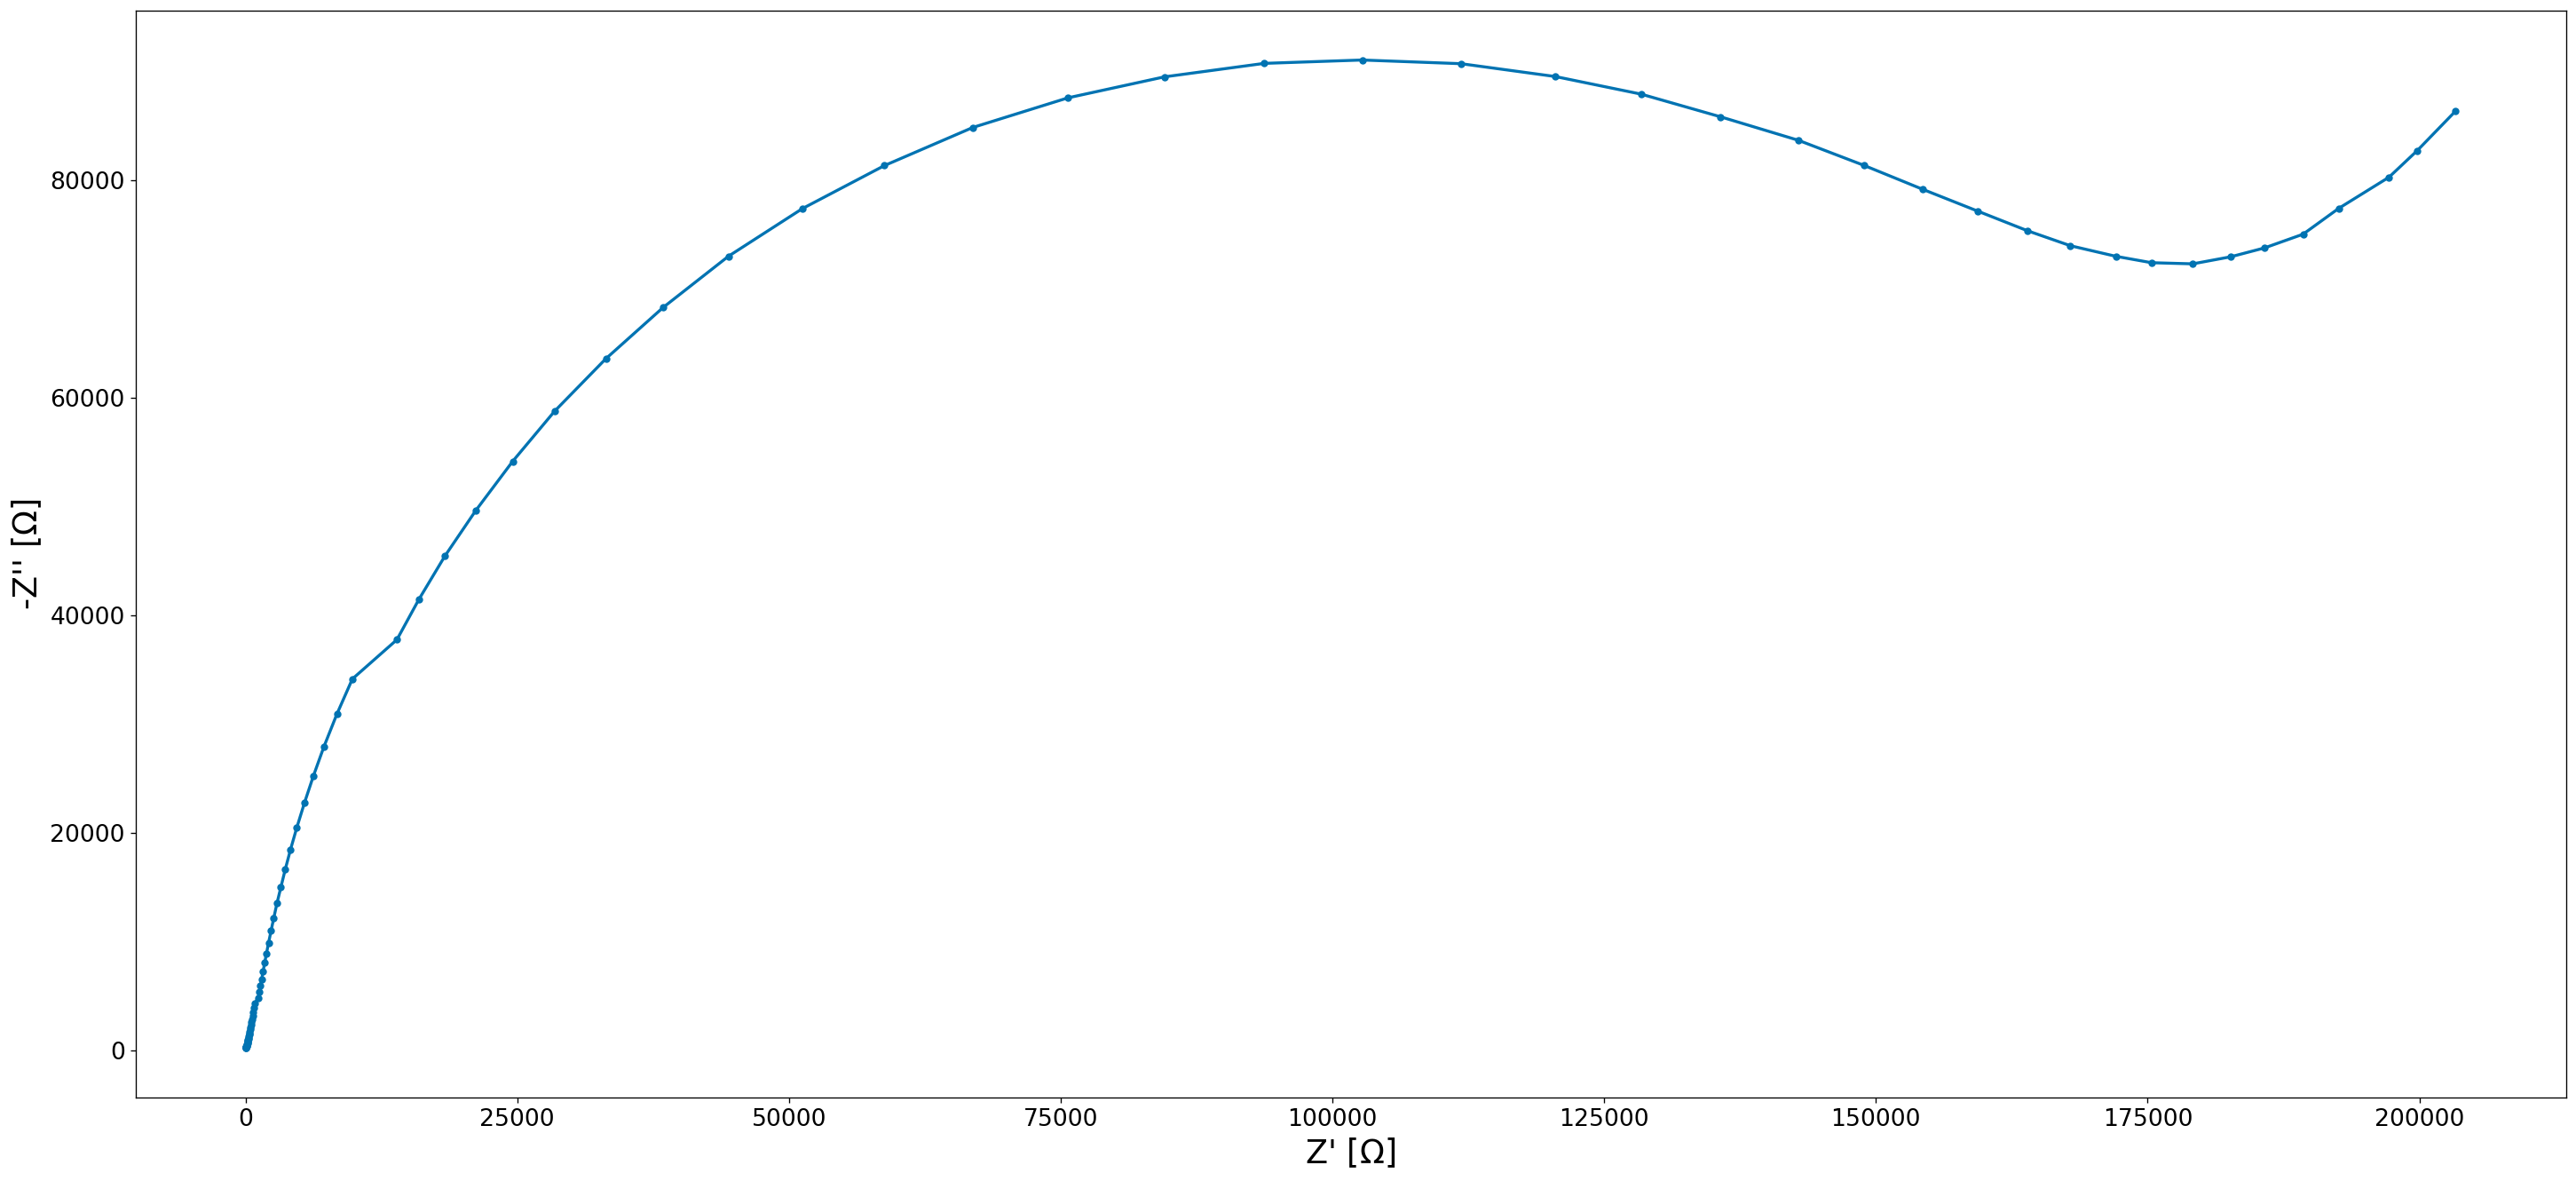

In [15]:
list_graphing(path, good_graphs)

In [16]:
def auto_fit(path, lst = None, take_csv = False):
    bad_mpts = []
    if not lst:
        path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[-3:] == 'mpt']
        for i in path_files:
            try:
                print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                masked_mpt.guesser(to_csv = take_csv)
            except ValueError:
                bad_mpts.append(i)
                print(i, ' was a bad file, could not find a mask')
    for i in lst:
            try:
                print(i, ' was a permissible file')
                ex_mpt = mpt_data(path,[i])
                masked_mpt = mpt_data(path,[i], mask = ex_mpt.masker())
                masked_mpt.guesser(to_csv = take_csv)
            except ValueError:
                bad_mpts.append(i)
                print(i, ' was a bad file, could not find a mask')
    

DE_49_7_30.mpt  was a permissible file
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73853
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73853
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73853
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877444437.23972
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73853
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.7693
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73807
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447542.0117
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.7437
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447475.7866
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.73865
MPT FILE :  DE_49_7_30.mpt  ERROR:  159877447545.06207
MPT FILE :  DE_49_7_30.mpt  ERROR:  61542964461691.05
MPT FILE :  DE_49_7_30.mpt  ERROR:  61542964594912.16
MPT FILE :  DE_49_7_30.mpt  ERROR:  61587218072437.63
MPT FILE :  DE_49_7_30.mpt  ERROR:  61542964322719.85
MPT FILE :  DE_49_7_30.mpt  ERROR:  61542298778985.945
MPT FILE :  DE_49_7_30.mpt  ERROR:

MPT FILE :  DE_49_7_30.mpt  ERROR:  119535250.74807262
MPT FILE :  DE_49_7_30.mpt  ERROR:  119462137.03185132
MPT FILE :  DE_49_7_30.mpt  ERROR:  119464973.51942301
MPT FILE :  DE_49_7_30.mpt  ERROR:  119456368.59276646
MPT FILE :  DE_49_7_30.mpt  ERROR:  119461981.39474733
MPT FILE :  DE_49_7_30.mpt  ERROR:  112838694.56916103
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774733.1472142
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774738.34810147
MPT FILE :  DE_49_7_30.mpt  ERROR:  93917617.29491886
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774710.57781309
MPT FILE :  DE_49_7_30.mpt  ERROR:  92487895.74590698
MPT FILE :  DE_49_7_30.mpt  ERROR:  92787485.96758205
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774721.06568232
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774930.59500627
MPT FILE :  DE_49_7_30.mpt  ERROR:  92771307.7493302
MPT FILE :  DE_49_7_30.mpt  ERROR:  92774737.7310189
MPT FILE :  DE_49_7_30.mpt  ERROR:  106223588.67207955
MPT FILE :  DE_49_7_30.mpt  ERROR:  98202855.31622076
MPT FILE :  DE_49_7_30.m

MPT FILE :  DE_49_7_30.mpt  ERROR:  138668803.14885244
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668804.1085441
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668825.2555151
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668812.37855005
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668706.591737
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668830.43931544
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668802.09851763
MPT FILE :  DE_49_7_30.mpt  ERROR:  139989421.96578658
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668801.2012485
MPT FILE :  DE_49_7_30.mpt  ERROR:  138668803.14885244
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619906.27607533
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619907.27680221
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619930.53833765
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619916.30180858
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619785.88102517
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619925.3047058
MPT FILE :  DE_49_7_30.mpt  ERROR:  125619906.14226471
MPT FILE :  DE_49_7_30.mpt  ERROR:  126510188.34546968
MPT FILE :  DE_4

MPT FILE :  DE_49_7_30.mpt  ERROR:  112568103.16301306
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568103.69042411
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568132.04143354
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568102.58948947
MPT FILE :  DE_49_7_30.mpt  ERROR:  112567870.47378613
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568098.9186188
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568103.16249639
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568102.8780158
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568103.14910458
MPT FILE :  DE_49_7_30.mpt  ERROR:  112568103.16301306
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565768.87036386
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565769.39776978
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565797.74876097
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565768.29678908
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565536.15261677
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565764.6296712
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565768.86985335
MPT FILE :  DE_49_7_30.mpt  ERROR:  112565768.58556089
MPT FILE :  D

MPT FILE :  DE_49_7_30.mpt  ERROR:  112588712.91504794
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559943.4764916
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072742
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   223.637452 (init = 223.6375)
    R:    75806.9123 (init = 75806.91)
    n:    0.85167114 (init = 0.8516711)
    fs:   899.934612 (init = 899.9346)
    R2:   132920.981 (init = 132921)
    n2:   

    fs3:  10.0000000 (init = 10)
None
ITERATION NO. :  18
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560147.48563045
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560175.89745569
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.3870332
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559914.17308035
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560142.74388441
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96121797
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.67639247
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072614
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
MPT FILE :  DE_49_7_30.mpt  ERROR:  2688071877.143697
MPT FILE :  DE_49_7_30.mpt  ERROR:  577593779.7228808
MPT FILE :  DE_49_7_30.mpt  ERROR:  117833087.84289807
MPT FILE :  DE_49_7_30.mpt  ERROR:  1172374233.0065527
MPT FILE :  DE_49_7_30.mpt  ERROR:  112632140.79109392
MPT FILE :

MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072619
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072769
MPT FILE :  DE_49_7_30.mpt  ERROR:  2594357747.222366
MPT FILE :  DE_49_7_30.mpt  ERROR:  937814261.4809849
MPT FILE :  DE_49_7_30.mpt  ERROR:  116353944.93448323
MPT FILE :  DE_49_7_30.mpt  ERROR:  2022610804.334014
MPT FILE :  DE_49_7_30.mpt  ERROR:  112748657.62922445
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559481.90674399
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072769
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at bo

MPT FILE :  DE_49_7_30.mpt  ERROR:  112559914.1730803
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560142.74388446
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96121803
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.67639247
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072614
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
MPT FILE :  DE_49_7_30.mpt  ERROR:  2587945981.6129074
MPT FILE :  DE_49_7_30.mpt  ERROR:  2602369486.051892
MPT FILE :  DE_49_7_30.mpt  ERROR:  136875035.04569387
MPT FILE :  DE_49_7_30.mpt  ERROR:  729085845.5792488
MPT FILE :  DE_49_7_30.mpt  ERROR:  112587079.62065047
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559964.07835686
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072763
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warn

MPT FILE :  DE_49_7_30.mpt  ERROR:  2436472249.8035164
MPT FILE :  DE_49_7_30.mpt  ERROR:  893970166.2175332
MPT FILE :  DE_49_7_30.mpt  ERROR:  126946576.19183078
MPT FILE :  DE_49_7_30.mpt  ERROR:  746289944.052776
MPT FILE :  DE_49_7_30.mpt  ERROR:  112588637.29007229
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559943.77869713
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072769
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary


MPT FILE :  DE_49_7_30.mpt  ERROR:  112588547.20951402
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559938.75991908
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072768
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   223.637452 (init = 223.6375)
    R:    75806.9123 (init = 75806.91)
    n:    0.85167114 (init = 0.8516711)
    fs:   899.934612 (init = 899.9346)
    R2:   132920.981 (init = 132921)
    n2:  

MPT FILE :  DE_49_7_30.mpt  ERROR:  112559914.17308033
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560142.74388435
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96121794
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.67639242
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607261
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607276
MPT FILE :  DE_49_7_30.mpt  ERROR:  2675461013.377091
MPT FILE :  DE_49_7_30.mpt  ERROR:  465643371.49893224
MPT FILE :  DE_49_7_30.mpt  ERROR:  120612769.31965978
MPT FILE :  DE_49_7_30.mpt  ERROR:  763374716.4371351
MPT FILE :  DE_49_7_30.mpt  ERROR:  112589135.67532362
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559902.31262669
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607276
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warnin

MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.67639221
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607259
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607274
MPT FILE :  DE_49_7_30.mpt  ERROR:  2584022169.728588
MPT FILE :  DE_49_7_30.mpt  ERROR:  761464625.5585082
MPT FILE :  DE_49_7_30.mpt  ERROR:  116426332.01142198
MPT FILE :  DE_49_7_30.mpt  ERROR:  1961850505.4714842
MPT FILE :  DE_49_7_30.mpt  ERROR:  112738871.80761185
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559488.48147953
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.9607274
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at ini

MPT FILE :  DE_49_7_30.mpt  ERROR:  749455512.0557841
MPT FILE :  DE_49_7_30.mpt  ERROR:  112588905.60324153
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559941.85048753
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072745
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   223.637452 (init = 223.6375)
    R:    75806.9123 (init = 75806.91)
    n:    0.85167114 (init = 0.8516711)
    fs:   899.934612 (init = 89

MPT FILE :  DE_49_7_30.mpt  ERROR:  112560147.48563078
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560175.8974561
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.38703357
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559914.17308061
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560142.74388474
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96121833
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.67639276
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072644
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072794
MPT FILE :  DE_49_7_30.mpt  ERROR:  2681907466.6121492
MPT FILE :  DE_49_7_30.mpt  ERROR:  481778518.8682076
MPT FILE :  DE_49_7_30.mpt  ERROR:  122312847.59618694
MPT FILE :  DE_49_7_30.mpt  ERROR:  757945785.3112624
MPT FILE :  DE_49_7_30.mpt  ERROR:  112589052.7831473
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559921.48972194
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072794
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables

No handles with labels found to put in legend.


 DE_49_7_30.mpt  ERROR:  112559914.17308065
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560142.7438848
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96121836
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.6763928
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072647
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072799
MPT FILE :  DE_49_7_30.mpt  ERROR:  2634605793.3867965
MPT FILE :  DE_49_7_30.mpt  ERROR:  458498098.6251938
MPT FILE :  DE_49_7_30.mpt  ERROR:  121075216.17410997
MPT FILE :  DE_49_7_30.mpt  ERROR:  761825979.3882645
MPT FILE :  DE_49_7_30.mpt  ERROR:  112589206.88665049
MPT FILE :  DE_49_7_30.mpt  ERROR:  112559913.13109276
MPT FILE :  DE_49_7_30.mpt  ERROR:  112560146.96072799
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 182
    # variables        = 9
    chi-square         = 239698.661
    reduced chi-square = 1385.54140
    Akaike info crit   = 1325.32987
    Bayesian info crit = 1354.16593
##  Warning: uncerta

C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:223: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')
C:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:223: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')


DE_49_8_30.mpt  was a permissible file
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.68
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.68
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.68
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127806104.2225
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.68
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.7333
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.67896
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810418.7965
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.6898
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810278.45996
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810426.6802
MPT FILE :  DE_49_8_30.mpt  ERROR:  293127810425.25183
MPT FILE :  DE_49_8_30.mpt  ERROR:  111226724085618.52
MPT FILE :  DE_49_8_30.mpt  ERROR:  111226724282132.94
MPT FILE :  DE_49_8_30.mpt  ERROR:  111279880602085.55
MPT FILE :  DE_49_8_30.mpt  ERROR:  111226723551004.0
MPT FILE :  DE_49_8_30.mpt  ERROR:  111229471840702.39
MPT FILE :  DE_49_8_30.mpt  ERROR:  11122562

MPT FILE :  DE_49_8_30.mpt  ERROR:  93364558410.85754
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364564550.97806
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364557332.4321
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364557091.02435
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364553791.81943
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364538128.2042
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364557149.15157
MPT FILE :  DE_49_8_30.mpt  ERROR:  93364557183.72298
MPT FILE :  DE_49_8_30.mpt  ERROR:  168783223464.99927
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272078603.84984
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272069280.53848
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272080273.76591
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272073242.99161
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272078923.25145
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272078574.51219
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272075941.92278
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272068767.9216
MPT FILE :  DE_49_8_30.mpt  ERROR:  91272078398.64215
MPT FILE :  DE_49_8_30.mpt  ER

MPT FILE :  DE_49_8_30.mpt  ERROR:  32542646751.24753
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542643299.4487
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542646911.875664
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542646643.15663
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542659103.791046
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542646656.915657
MPT FILE :  DE_49_8_30.mpt  ERROR:  32542646643.18797
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942588.421154
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539943538.469482
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942580.444195
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942694.010883
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539939255.925205
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942857.036327
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942588.389954
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539955044.500393
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942542.80099
MPT FILE :  DE_49_8_30.mpt  ERROR:  32539942588.421154
MPT FILE :  DE_49_8_30.mpt  ERROR:  32538771785.9417
MPT FILE :  DE_49_

MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306697.277042
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535305998.011673
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306949.211826
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307189.707466
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535309709.819214
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.550163
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307028.445946
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54841
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54826
MPT FILE :  DE_49_8_30.mpt  ERROR:  107192522065.25491
MPT FILE :  DE_49_8_30.mpt  ERROR:  100966719373.05353
MPT FILE :  DE_49_8_30.mpt  ERROR:  69111608577.95668
MPT FILE :  DE_49_8_30.mpt  ERROR:  86571184251.304
MPT FILE :  DE_49_8_30.mpt  ERROR:  94813162870.91727
MPT FILE :  DE_49_8_30.mpt  ERROR:  83768304620.83023
MPT FILE :  DE_49_8_30.mpt  ERROR:  33015163526.205215
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54826
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals  

MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307189.70751
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535309709.819267
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.550194
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307028.445972
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.548447
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.548298
MPT FILE :  DE_49_8_30.mpt  ERROR:  108227403909.79327
MPT FILE :  DE_49_8_30.mpt  ERROR:  81091783455.74393
MPT FILE :  DE_49_8_30.mpt  ERROR:  109221137101.92564
MPT FILE :  DE_49_8_30.mpt  ERROR:  63654745163.26602
MPT FILE :  DE_49_8_30.mpt  ERROR:  90944186968.89738
MPT FILE :  DE_49_8_30.mpt  ERROR:  84423090661.31537
MPT FILE :  DE_49_8_30.mpt  ERROR:  33025467417.041477
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.548298
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190
    # variables        = 9
    chi-square         = 3.1369e+09
    reduced chi-square = 17330888.6
    Akaike info crit   = 31

MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54842
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54827
MPT FILE :  DE_49_8_30.mpt  ERROR:  99518155553.97427
MPT FILE :  DE_49_8_30.mpt  ERROR:  74180054871.62025
MPT FILE :  DE_49_8_30.mpt  ERROR:  88761376395.98782
MPT FILE :  DE_49_8_30.mpt  ERROR:  35185628175.156876
MPT FILE :  DE_49_8_30.mpt  ERROR:  93765872410.89572
MPT FILE :  DE_49_8_30.mpt  ERROR:  81380384100.33107
MPT FILE :  DE_49_8_30.mpt  ERROR:  32980036321.104553
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54827
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190
    # variables        = 9
    chi-square         = 3.1369e+09
    reduced chi-square = 17330888.6
    Akaike info crit   = 3175.70004
    Bayesian info crit = 3204.92326
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initia

MPT FILE :  DE_49_8_30.mpt  ERROR:  36618034476.47102
MPT FILE :  DE_49_8_30.mpt  ERROR:  36036194528.87211
MPT FILE :  DE_49_8_30.mpt  ERROR:  34586844358.47078
MPT FILE :  DE_49_8_30.mpt  ERROR:  39097567222.214554
MPT FILE :  DE_49_8_30.mpt  ERROR:  97154394176.1607
MPT FILE :  DE_49_8_30.mpt  ERROR:  42445660850.71004
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.548264
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190
    # variables        = 9
    chi-square         = 3.1369e+09
    reduced chi-square = 17330888.6
    Akaike info crit   = 3175.70004
    Bayesian info crit = 3204.92326
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[V

MPT FILE :  DE_49_8_30.mpt  ERROR:  33071453395.090794
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54828
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190
    # variables        = 9
    chi-square         = 3.1369e+09
    reduced chi-square = 17330888.6
    Akaike info crit   = 3175.70004
    Bayesian info crit = 3204.92326
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   3777.64421 (init = 3777.644)
    R:    29018.0463 (init = 29018.05)
    n:    0.99996457 (init = 0.9999646)
    fs:   2053.03161 (init = 2053.032)
    R2:   383694.412 (init = 383694.4)
    n2:   0.65000000 (init = 0.65)
    fs2:  6.35423815 (init =

MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54826
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54826
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306697.27704
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535305998.011677
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306949.211826
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307189.707474
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535309709.81923
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.550156
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535307028.445934
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54841
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54826
MPT FILE :  DE_49_8_30.mpt  ERROR:  113481322658.76071
MPT FILE :  DE_49_8_30.mpt  ERROR:  36928982812.306946
MPT FILE :  DE_49_8_30.mpt  ERROR:  70442640612.59093
MPT FILE :  DE_49_8_30.mpt  ERROR:  95292744085.67601
MPT FILE :  DE_49_8_30.mpt  ERROR:  49206538317.083954
MPT FILE :  DE_49_8_30.mpt  ERROR:  35065751998.75897
MPT FILE :  DE_49_8_30.mpt  ERROR:  35995474844.39711
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  33028445873.713512
MPT FILE :  DE_49_8_30.mpt  ERROR:  32535306950.54824
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 190
    # variables        = 9
    chi-square         = 3.1369e+09
    reduced chi-square = 17330888.6
    Akaike info crit   = 3175.70004
    Bayesian info crit = 3204.92326
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    n2:   at boundary
    fs2:  at initial value
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   3777.64421 (init = 3777.644)
    R:    29018.0463 (init = 29018.05)
    n:    0.99996457 (init = 0.9999646)
    fs:   2053.03161 (init = 2053.032)
    R2:   383694.412 (init = 383694.4)
    n2:   0.65000000 (init = 0.65)
    fs2:  6.35423815 (init =

MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086484.18107
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086265.883526
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719085580.339134
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086484.37944
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086799.137478
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719089274.278477
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086485.737003
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086564.11316
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086574.09845
MPT FILE :  DE_49_8_30.mpt  ERROR:  31719086484.18107
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648591.170727
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648379.137947
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582647696.113876
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648590.963036
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648919.27366
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582651387.541676
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648581.09959
MPT FILE :  DE_49_8_30.mpt  ERROR:  31582648671.50748
MPT FILE :  DE_49_

MPT FILE :  DE_49_8_30.mpt  ERROR:  23008016470.94947
MPT FILE :  DE_49_8_30.mpt  ERROR:  23008014630.845093
MPT FILE :  DE_49_8_30.mpt  ERROR:  23008014115.2834
MPT FILE :  DE_49_8_30.mpt  ERROR:  23008013975.32106
MPT FILE :  DE_49_8_30.mpt  ERROR:  23008014053.645767
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479350.49597
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479259.438347
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746478690.569603
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479731.899994
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479448.386272
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746481602.448784
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746478452.556248
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479403.70193
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479336.33438
MPT FILE :  DE_49_8_30.mpt  ERROR:  21746479350.49597
MPT FILE :  DE_49_8_30.mpt  ERROR:  19481291074.271866
MPT FILE :  DE_49_8_30.mpt  ERROR:  19481290997.66366
MPT FILE :  DE_49_8_30.mpt  ERROR:  19481290462.45893
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  367299491.3647356
MPT FILE :  DE_49_8_30.mpt  ERROR:  367299648.50833106
MPT FILE :  DE_49_8_30.mpt  ERROR:  367286653.2770821
MPT FILE :  DE_49_8_30.mpt  ERROR:  367299644.72462785
MPT FILE :  DE_49_8_30.mpt  ERROR:  367299636.3823353
MPT FILE :  DE_49_8_30.mpt  ERROR:  367299639.00064564
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368483.6003388
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368491.1272471
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368519.1189221
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368554.2760624
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368414.70348436
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368491.5761659
MPT FILE :  DE_49_8_30.mpt  ERROR:  358354579.150776
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368489.0981765
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368483.1019973
MPT FILE :  DE_49_8_30.mpt  ERROR:  358368483.6003388
MPT FILE :  DE_49_8_30.mpt  ERROR:  352002701.44761616
MPT FILE :  DE_49_8_30.mpt  ERROR:  352002707.83656126
MPT FILE :  DE_49_8_30.

MPT FILE :  DE_49_8_30.mpt  ERROR:  295887267.5690215
MPT FILE :  DE_49_8_30.mpt  ERROR:  295887266.11489713
MPT FILE :  DE_49_8_30.mpt  ERROR:  295866746.8081403
MPT FILE :  DE_49_8_30.mpt  ERROR:  295887267.4381381
MPT FILE :  DE_49_8_30.mpt  ERROR:  295887261.7679351
MPT FILE :  DE_49_8_30.mpt  ERROR:  295887263.524474
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493318.2952776
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493321.6119973
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493331.82699746
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493400.4584209
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493321.8537231
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493320.859883
MPT FILE :  DE_49_8_30.mpt  ERROR:  295472778.061844
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493322.1995076
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493317.7991185
MPT FILE :  DE_49_8_30.mpt  ERROR:  295493318.2952776
MPT FILE :  DE_49_8_30.mpt  ERROR:  295061778.4996283
MPT FILE :  DE_49_8_30.mpt  ERROR:  295061781.78403425
MPT FILE :  DE_49_8_30.mpt  

MPT FILE :  DE_49_8_30.mpt  ERROR:  240087671.4824157
MPT FILE :  DE_49_8_30.mpt  ERROR:  240087663.93009436
MPT FILE :  DE_49_8_30.mpt  ERROR:  240087674.18913162
MPT FILE :  DE_49_8_30.mpt  ERROR:  240087673.0721982
MPT FILE :  DE_49_8_30.mpt  ERROR:  240087670.49338168
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944095.46355355
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944096.4094149
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944150.13030553
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944091.5009234
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944064.85849234
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944098.5763145
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944088.78159416
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944099.50681037
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944096.76786053
MPT FILE :  DE_49_8_30.mpt  ERROR:  234944095.46355355
MPT FILE :  DE_49_8_30.mpt  ERROR:  230229934.88186646
MPT FILE :  DE_49_8_30.mpt  ERROR:  230229935.69272238
MPT FILE :  DE_49_8_30.mpt  ERROR:  230229981.03263208
MPT FILE :  DE_

MPT FILE :  DE_49_8_30.mpt  ERROR:  219459446.114609
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459398.05421418
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459454.09238756
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459443.98680484
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459454.13468128
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459450.44005117
MPT FILE :  DE_49_8_30.mpt  ERROR:  219459450.18081188
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433147.464939
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433148.1952845
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433187.6636586
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433143.39862394
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433095.3136078
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433151.37744355
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433141.27176565
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433151.4186016
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433149.34321368
MPT FILE :  DE_49_8_30.mpt  ERROR:  219433147.464939
MPT FILE :  DE_49_8_30.mpt  ERROR:  219409825.20999968
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  204045485.88064703
MPT FILE :  DE_49_8_30.mpt  ERROR:  204045496.08552113
MPT FILE :  DE_49_8_30.mpt  ERROR:  204045491.80317318
MPT FILE :  DE_49_8_30.mpt  ERROR:  204045492.04790086
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636520.07664776
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636520.9330414
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636567.86025247
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636516.21470523
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636478.90961125
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636524.60360178
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636513.9376515
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636524.09010237
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636520.10090038
MPT FILE :  DE_49_8_30.mpt  ERROR:  203636520.07664776
MPT FILE :  DE_49_8_30.mpt  ERROR:  202852354.76468402
MPT FILE :  DE_49_8_30.mpt  ERROR:  202852355.5964013
MPT FILE :  DE_49_8_30.mpt  ERROR:  202852401.17025915
MPT FILE :  DE_49_8_30.mpt  ERROR:  202852350.89484912
MPT FILE :  D

MPT FILE :  DE_49_8_30.mpt  ERROR:  201048048.79733354
MPT FILE :  DE_49_8_30.mpt  ERROR:  201048112.0806982
MPT FILE :  DE_49_8_30.mpt  ERROR:  201048101.04584402
MPT FILE :  DE_49_8_30.mpt  ERROR:  201048111.16688925
MPT FILE :  DE_49_8_30.mpt  ERROR:  201048107.1277746
MPT FILE :  DE_49_8_30.mpt  ERROR:  201048107.1016472
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034442.57094297
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034443.38128692
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034487.8377623
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034438.70230472
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034384.20321068
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034447.55220002
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034436.51550204
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034446.63645416
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034442.54329222
MPT FILE :  DE_49_8_30.mpt  ERROR:  201034442.57094297
MPT FILE :  DE_49_8_30.mpt  ERROR:  201030905.9550271
MPT FILE :  DE_49_8_30.mpt  ERROR:  201030906.76536718
MPT FILE :  DE_

MPT FILE :  DE_49_8_30.mpt  ERROR:  200772377.6478579
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772422.26219937
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772372.968916
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772317.3221086
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772381.9374621
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772370.78877214
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772380.90841264
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772376.8374104
MPT FILE :  DE_49_8_30.mpt  ERROR:  200772376.83748215
MPT FILE :  DE_49_8_30.mpt  ERROR:  2656938602888.0864
MPT FILE :  DE_49_8_30.mpt  ERROR:  21578654708.10746
MPT FILE :  DE_49_8_30.mpt  ERROR:  388762398.5670239
MPT FILE :  DE_49_8_30.mpt  ERROR:  209288955.96009237
MPT FILE :  DE_49_8_30.mpt  ERROR:  201361774.45277393
MPT FILE :  DE_49_8_30.mpt  ERROR:  201361775.40608996
MPT FILE :  DE_49_8_30.mpt  ERROR:  201361828.7890782
MPT FILE :  DE_49_8_30.mpt  ERROR:  201361770.70772064
MPT FILE :  DE_49_8_30.mpt  ERROR:  201361742.8511533
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.08493602
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.08493602
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.08493602
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.97224706
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106152.2134285
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106097.3291235
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106041.7139121
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106105.5341263
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106094.96867865
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106105.0879535
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.08489138
MPT FILE :  DE_49_8_30.mpt  ERROR:  199106101.08493602
MPT FILE :  DE_49_8_30.mpt  ERROR:  16257797267.375084
MPT FILE :  DE_49_8_30.mpt  ERROR:  15948973675.252342
MPT FILE :  DE_49_8_30.mpt  ERROR:  316122339.5354672
MPT FILE :  DE_49_8_30.mpt  ERROR:  207206245.7993529
MPT FILE :  DE_49_8_30.mpt  ERROR:  199705232.37548357
MPT FILE :  DE_49_8_30.mpt  ERROR:  199705233.3821707
MPT FILE :  DE_49_

MPT FILE :  DE_49_8_30.mpt  ERROR:  176601528.18245026
MPT FILE :  DE_49_8_30.mpt  ERROR:  176601520.26739806
MPT FILE :  DE_49_8_30.mpt  ERROR:  176601529.61721668
MPT FILE :  DE_49_8_30.mpt  ERROR:  176601525.83595696
MPT FILE :  DE_49_8_30.mpt  ERROR:  176601525.966801
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875735.63293585
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875736.8238886
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875815.43536064
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875732.81551325
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875533.15462762
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875738.1337152
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875730.12576085
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875739.27030182
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875734.6690846
MPT FILE :  DE_49_8_30.mpt  ERROR:  172875735.63293585
MPT FILE :  DE_49_8_30.mpt  ERROR:  171890089.03865907
MPT FILE :  DE_49_8_30.mpt  ERROR:  171890090.29118338
MPT FILE :  DE_49_8_30.mpt  ERROR:  171890172.550984
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  167886952.2928276
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794243.00509807
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794244.2078209
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794323.8272606
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794240.2609291
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794040.60752672
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794245.50760442
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794237.7108013
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794246.57333982
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794244.02323595
MPT FILE :  DE_49_8_30.mpt  ERROR:  167794243.00509807
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730360.11008757
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730361.3120897
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730440.8897914
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730357.36605603
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730157.53183633
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730362.6193565
MPT FILE :  DE_49_8_30.mpt  ERROR:  167730354.818801
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  166978830.7456876
MPT FILE :  DE_49_8_30.mpt  ERROR:  166978830.79992986
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826650.920641
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826652.11398083
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826731.19839364
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826648.1796065
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826446.06298605
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826653.5336423
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826645.67049107
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826654.4964822
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826652.17472085
MPT FILE :  DE_49_8_30.mpt  ERROR:  166826650.920641
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749792.25209597
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749793.44554353
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749872.53710416
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749789.5119839
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749587.42360154
MPT FILE :  DE_49_8_30.mpt  ERROR:  166749794.86674565
MPT FILE :  DE_49_8

MPT FILE :  DE_49_8_30.mpt  ERROR:  164294243.73487127
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294160.7387653
MPT FILE :  DE_49_8_30.mpt  ERROR:  164293956.9953662
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294166.1485837
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294158.31343776
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294167.00544757
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294162.1016317
MPT FILE :  DE_49_8_30.mpt  ERROR:  164294163.44980568
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285784.68932182
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285785.88055345
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285864.97254384
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285781.97839797
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285578.2146145
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285787.3874938
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285779.55345795
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285788.24467492
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285786.04970536
MPT FILE :  DE_49_8_30.mpt  ERROR:  164285784.68932182
MPT FILE :  DE_4

MPT FILE :  DE_49_8_30.mpt  ERROR:  161808221.38704193
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808137.50557864
MPT FILE :  DE_49_8_30.mpt  ERROR:  161807931.80895138
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808142.6657582
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808135.15956348
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808143.63471764
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808140.0644254
MPT FILE :  DE_49_8_30.mpt  ERROR:  161808140.16312456
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750594.29929107
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750595.4993735
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750675.48836043
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750591.64233106
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750385.6212011
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750596.8039247
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750589.2992076
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750597.77013344
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750595.3475532
MPT FILE :  DE_49_8_30.mpt  ERROR:  161750594.29929107
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  161224453.03154683
MPT FILE :  DE_49_8_30.mpt  ERROR:  161224452.10830843
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215938.81650776
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215940.01440734
MPT FILE :  DE_49_8_30.mpt  ERROR:  161216019.97747955
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215936.16858235
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215727.97589135
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215941.3409012
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215933.84673122
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215942.2819592
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215938.87727088
MPT FILE :  DE_49_8_30.mpt  ERROR:  161215938.81650776
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203482.31037226
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203483.50820854
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203563.46979287
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203479.6626442
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203271.4180078
MPT FILE :  DE_49_8_30.mpt  ERROR:  161203484.8352877
MPT FILE :  DE_

MPT FILE :  DE_49_8_30.mpt  ERROR:  157753899.6077331
MPT FILE :  DE_49_8_30.mpt  ERROR:  157754150.4241888
MPT FILE :  DE_49_8_30.mpt  ERROR:  157754146.6090446
MPT FILE :  DE_49_8_30.mpt  ERROR:  157754153.5653622
MPT FILE :  DE_49_8_30.mpt  ERROR:  157754149.1183088
MPT FILE :  DE_49_8_30.mpt  ERROR:  157754150.96224958
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365114.179381
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365115.51180103
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365207.62900284
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365111.94877732
MPT FILE :  DE_49_8_30.mpt  ERROR:  157364870.25319278
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365113.26743913
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365109.8643254
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365116.68054658
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365114.78096947
MPT FILE :  DE_49_8_30.mpt  ERROR:  157365114.179381
MPT FILE :  DE_49_8_30.mpt  ERROR:  156297824.00815332
MPT FILE :  DE_49_8_30.mpt  ERROR:  156297825.32066745
MPT FILE :  DE_49_8_

MPT FILE :  DE_49_8_30.mpt  ERROR:  134147868.49855237
MPT FILE :  DE_49_8_30.mpt  ERROR:  134147867.95452909
MPT FILE :  DE_49_8_30.mpt  ERROR:  134147867.83347681
MPT FILE :  DE_49_8_30.mpt  ERROR:  134147869.64896023
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557088.840784
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557089.84786937
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557163.97144452
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557087.37446792
MPT FILE :  DE_49_8_30.mpt  ERROR:  133556785.78231123
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557077.14272597
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557087.77948019
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557086.80141911
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557089.07622334
MPT FILE :  DE_49_8_30.mpt  ERROR:  133557088.840784
MPT FILE :  DE_49_8_30.mpt  ERROR:  132460731.9978823
MPT FILE :  DE_49_8_30.mpt  ERROR:  132460732.98335728
MPT FILE :  DE_49_8_30.mpt  ERROR:  132460806.2919327
MPT FILE :  DE_49_8_30.mpt  ERROR:  132460730.51989043
MPT FILE :  DE_4

MPT FILE :  DE_49_8_30.mpt  ERROR:  125634952.50670639
MPT FILE :  DE_49_8_30.mpt  ERROR:  125634966.13915409
MPT FILE :  DE_49_8_30.mpt  ERROR:  125634962.15673533
MPT FILE :  DE_49_8_30.mpt  ERROR:  125634965.2768802
MPT FILE :  DE_49_8_30.mpt  ERROR:  125634966.14923912
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565669.41214365
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565669.7992002
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565701.22575417
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565668.09808941
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565334.42950138
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565655.99634045
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565669.4044328
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565665.46972129
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565669.14580742
MPT FILE :  DE_49_8_30.mpt  ERROR:  125565669.41214365
MPT FILE :  DE_49_8_30.mpt  ERROR:  125425178.51455656
MPT FILE :  DE_49_8_30.mpt  ERROR:  125425178.88606313
MPT FILE :  DE_49_8_30.mpt  ERROR:  125425209.50179124
MPT FILE :  D

MPT FILE :  DE_49_8_30.mpt  ERROR:  134426130.44785243
MPT FILE :  DE_49_8_30.mpt  ERROR:  134426127.6133725
MPT FILE :  DE_49_8_30.mpt  ERROR:  134426130.25794443
MPT FILE :  DE_49_8_30.mpt  ERROR:  134426130.32072967
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455065.8966968
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455065.93478623
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455075.36601067
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455064.69444203
MPT FILE :  DE_49_8_30.mpt  ERROR:  134454685.65424055
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455059.00347352
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455066.02455103
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455063.17730176
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455065.85138446
MPT FILE :  DE_49_8_30.mpt  ERROR:  134455065.8966968
MPT FILE :  DE_49_8_30.mpt  ERROR:  134473459.31651485
MPT FILE :  DE_49_8_30.mpt  ERROR:  134473459.35538572
MPT FILE :  DE_49_8_30.mpt  ERROR:  134473468.83423057
MPT FILE :  DE_49_8_30.mpt  ERROR:  134473458.11487943
MPT FILE :  D

MPT FILE :  DE_49_8_30.mpt  ERROR:  134529194.79434642
MPT FILE :  DE_49_8_30.mpt  ERROR:  134529192.09582412
MPT FILE :  DE_49_8_30.mpt  ERROR:  134529194.66673023
MPT FILE :  DE_49_8_30.mpt  ERROR:  134529194.66647044
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583558.1117889
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583558.13212666
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583567.41121486
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583556.903562
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583172.97291318
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583550.36202097
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583558.2446133
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583555.46492964
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583558.11623734
MPT FILE :  DE_49_8_30.mpt  ERROR:  134583558.1117889
MPT FILE :  DE_49_8_30.mpt  ERROR:  134602891.14941746
MPT FILE :  DE_49_8_30.mpt  ERROR:  134602891.17530867
MPT FILE :  DE_49_8_30.mpt  ERROR:  134602900.815039
MPT FILE :  DE_49_8_30.mpt  ERROR:  134602889.94405487
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  134697401.99573702
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697022.9349583
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697395.0650164
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697403.3286827
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697400.46152753
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697403.19185227
MPT FILE :  DE_49_8_30.mpt  ERROR:  134697403.19393954
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707238.89601442
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707238.93061656
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707249.1998509
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707237.69851124
MPT FILE :  DE_49_8_30.mpt  ERROR:  134706858.935382
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707230.7503132
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707239.03073812
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707236.16051486
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707238.8958844
MPT FILE :  DE_49_8_30.mpt  ERROR:  134707238.89601442
MPT FILE :  DE_49_8_30.mpt  ERROR:  134711704.2391476
MPT FILE :  DE_49_8

MPT FILE :  DE_49_8_30.mpt  ERROR:  134755087.1895196
MPT FILE :  DE_49_8_30.mpt  ERROR:  134755084.3065822
MPT FILE :  DE_49_8_30.mpt  ERROR:  134755087.04922777
MPT FILE :  DE_49_8_30.mpt  ERROR:  134755087.05420697
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.6720686
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.70829234
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757283.1132363
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757271.476629
MPT FILE :  DE_49_8_30.mpt  ERROR:  134756892.91805622
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757264.45916104
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.80737787
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757269.92306876
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.66976836
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.6720686
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757664.78294817
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757446.17410463
MPT FILE :  DE_49_8_30.mpt  ERROR:  134757272.6720686
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals 

MPT FILE :  DE_49_8_30.mpt  ERROR:  134850154.7455631
MPT FILE :  DE_49_8_30.mpt  ERROR:  134850162.93384367
MPT FILE :  DE_49_8_30.mpt  ERROR:  134850160.0864728
MPT FILE :  DE_49_8_30.mpt  ERROR:  134850162.7906831
MPT FILE :  DE_49_8_30.mpt  ERROR:  134850162.79264936
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852544.7420358
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852544.77117932
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852554.58704242
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852543.54476896
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852163.9791227
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852536.6860274
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852544.88317212
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852542.03415367
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852544.74185273
MPT FILE :  DE_49_8_30.mpt  ERROR:  134852544.7420358
MPT FILE :  DE_49_8_30.mpt  ERROR:  134854045.3553421
MPT FILE :  DE_49_8_30.mpt  ERROR:  134854045.38468492
MPT FILE :  DE_49_8_30.mpt  ERROR:  134854055.21492624
MPT FILE :  DE_49_

MPT FILE :  DE_49_8_30.mpt  ERROR:  134829421.7157082
MPT FILE :  DE_49_8_30.mpt  ERROR:  134829429.31107184
MPT FILE :  DE_49_8_30.mpt  ERROR:  134829426.6147226
MPT FILE :  DE_49_8_30.mpt  ERROR:  134829429.17139953
MPT FILE :  DE_49_8_30.mpt  ERROR:  134829429.17344707
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862217.5506823
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862217.57095727
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862226.8868715
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862216.34892476
MPT FILE :  DE_49_8_30.mpt  ERROR:  134861832.3186471
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862209.8886143
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862217.69181
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862214.9388612
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862217.5475179
MPT FILE :  DE_49_8_30.mpt  ERROR:  134862217.5506823
MPT FILE :  DE_49_8_30.mpt  ERROR:  134872770.66117316
MPT FILE :  DE_49_8_30.mpt  ERROR:  134872770.68134278
MPT FILE :  DE_49_8_30.mpt  ERROR:  134872779.96264213
MPT FILE :  DE_49_8_30

    fs3:  10.0000000 (init = 10)
None
ITERATION NO. :  76
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.19770247
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.19770247
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.19770247
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.2223627
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918591.74311924
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918581.00017712
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918200.00369754
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918574.21619278
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.3416494
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918579.50895777
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.19770154
MPT FILE :  DE_49_8_30.mpt  ERROR:  134918582.19770247
MPT FILE :  DE_49_8_30.mpt  ERROR:  11986405807.870087
MPT FILE :  DE_49_8_30.mpt  ERROR:  297942013.2709465
MPT FILE :  DE_49_8_30.mpt  ERROR:  135869479.37754494
MPT FILE :  DE_49_8_30.mpt  ERROR:  135167451.87041315
MPT FILE :  DE_49_8_30.mpt  ERROR:  135026821.1649707
MPT FILE : 

MPT FILE :  DE_49_8_30.mpt  ERROR:  134959555.02887636
MPT FILE :  DE_49_8_30.mpt  ERROR:  134959927.5504563
MPT FILE :  DE_49_8_30.mpt  ERROR:  134959935.82233548
MPT FILE :  DE_49_8_30.mpt  ERROR:  134959932.9573927
MPT FILE :  DE_49_8_30.mpt  ERROR:  134959935.68239433
MPT FILE :  DE_49_8_30.mpt  ERROR:  134959935.67780635
MPT FILE :  DE_49_8_30.mpt  ERROR:  134960388.61116338
MPT FILE :  DE_49_8_30.mpt  ERROR:  134960388.61116338
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 117
    # data points      = 190
    # variables        = 9
    chi-square         = 198285.035
    reduced chi-square = 1095.49743
    Akaike info crit   = 1338.58299
    Bayesian info crit = 1367.80620
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    n:    at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   203.546024 (init = 203.5459)
    R:    88141.0025 (init = 88139.23)
    n:    0.86993003 (init = 0.8699

MPT FILE :  DE_49_8_30.mpt  ERROR:  135136010.2179326
MPT FILE :  DE_49_8_30.mpt  ERROR:  135050016.33881956
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024848.5604707
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024848.58069313
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024857.7373733
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024847.36438233
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024466.3385173
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024840.54138154
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024848.71061987
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024845.86660153
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024848.5597363
MPT FILE :  DE_49_8_30.mpt  ERROR:  135024848.5604707
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027804.59382313
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027804.61450484
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027813.8059514
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027803.39809155
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027422.5196476
MPT FILE :  DE_49_8_30.mpt  ERROR:  135027796.56287774
MPT FILE :  DE_49_

MPT FILE :  DE_49_8_30.mpt  ERROR:  135066477.97921616
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066466.90210742
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066087.7342733
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066459.99998167
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066468.24182174
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066465.3884672
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066468.0964489
MPT FILE :  DE_49_8_30.mpt  ERROR:  135066468.0930431
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067826.26703337
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067826.29667884
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067836.17885318
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067825.07626444
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067445.99028736
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067818.1715365
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067826.41575956
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067823.5621226
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067826.2693283
MPT FILE :  DE_49_8_30.mpt  ERROR:  135067826.26703337
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  135114964.38320822
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114953.08058828
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114573.55414003
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114946.15192366
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114954.41777375
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114951.56453636
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114954.26549065
MPT FILE :  DE_49_8_30.mpt  ERROR:  135114954.2693109
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121640.8011343
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121640.8339677
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121651.00036445
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121639.61298773
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121260.41882354
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121632.66945064
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121640.9495089
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121638.09391707
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121640.80185223
MPT FILE :  DE_49_8_30.mpt  ERROR:  135121640.8011343
MPT FILE :  DE_

MPT FILE :  DE_49_8_30.mpt  ERROR:  135163945.8854852
MPT FILE :  DE_49_8_30.mpt  ERROR:  135164094.159814
MPT FILE :  DE_49_8_30.mpt  ERROR:  135163945.8854852
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 190
    # variables        = 9
    chi-square         = 198230.028
    reduced chi-square = 1095.19352
    Akaike info crit   = 1338.53027
    Bayesian info crit = 1367.75349
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    n3:   at boundary
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   203.495800 (init = 203.4958)
    R:    88160.2457 (init = 88160.23)
    n:    0.86988532 (init = 0.8698853)
    fs:   866.027695 (init = 866.0278)
    R2:   312999.727 (init = 313000.2)
    n2:   0.84059987 (init = 0.8405998

MPT FILE :  DE_49_8_30.mpt  ERROR:  135858305.3748177
MPT FILE :  DE_49_8_30.mpt  ERROR:  134309969.43964288
MPT FILE :  DE_49_8_30.mpt  ERROR:  134063645.63950178
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944284.9552317
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944284.93332551
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944289.59099257
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944283.80386141
MPT FILE :  DE_49_8_30.mpt  ERROR:  133943913.984941
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944277.29435673
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944285.32214206
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944283.03816119
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944284.94725569
MPT FILE :  DE_49_8_30.mpt  ERROR:  133944284.9552317
MPT FILE :  DE_49_8_30.mpt  ERROR:  133955649.43080154
MPT FILE :  DE_49_8_30.mpt  ERROR:  133955649.41581082
MPT FILE :  DE_49_8_30.mpt  ERROR:  133955654.68247554
MPT FILE :  DE_49_8_30.mpt  ERROR:  133955648.28192806
MPT FILE :  DE_49_8_30.mpt  ERROR:  133955278.36970484
MPT FILE :  DE_

MPT FILE :  DE_49_8_30.mpt  ERROR:  140161389.4804437
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161389.38608146
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161387.27340636
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161388.44687748
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161027.40011314
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161382.84131157
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161390.3383982
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161388.35760495
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161389.64917603
MPT FILE :  DE_49_8_30.mpt  ERROR:  140161389.4804437
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145074.22115645
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145074.13313717
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145072.525971
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145073.19148794
MPT FILE :  DE_49_8_30.mpt  ERROR:  140144713.08465782
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145067.3829827
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145075.07474747
MPT FILE :  DE_49_8_30.mpt  ERROR:  140145073.08385742
MPT FILE :  DE_4

MPT FILE :  DE_49_8_30.mpt  ERROR:  139761188.70275053
MPT FILE :  DE_49_8_30.mpt  ERROR:  139761188.7047591
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763958.30374986
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763958.2611173
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763960.85929668
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763957.29328543
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763589.0750776
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763951.35118082
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763959.07060915
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763957.13659972
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763958.3228576
MPT FILE :  DE_49_8_30.mpt  ERROR:  139763958.30374986
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748994.70486784
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748994.66458452
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748997.44176316
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748993.6959017
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748625.72637722
MPT FILE :  DE_49_8_30.mpt  ERROR:  139748987.6090839
MPT FILE :  DE_4

MPT FILE :  DE_49_8_30.mpt  ERROR:  139154014.99758163
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153132.66161674
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153132.63650417
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153136.6276368
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153131.64916408
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152760.38854223
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153125.28971967
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153133.38485658
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153131.48348564
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153132.64984122
MPT FILE :  DE_49_8_30.mpt  ERROR:  139153132.66161674
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152356.08070022
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152356.05575454
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152360.0590523
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152355.06834096
MPT FILE :  DE_49_8_30.mpt  ERROR:  139151983.85779035
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152348.7034173
MPT FILE :  DE_49_8_30.mpt  ERROR:  139152356.80388737
MPT FILE :  D

MPT FILE :  DE_49_8_30.mpt  ERROR:  138599531.4293814
MPT FILE :  DE_49_8_30.mpt  ERROR:  138599896.43327704
MPT FILE :  DE_49_8_30.mpt  ERROR:  138599905.02649736
MPT FILE :  DE_49_8_30.mpt  ERROR:  138599903.12778395
MPT FILE :  DE_49_8_30.mpt  ERROR:  138599904.33787033
MPT FILE :  DE_49_8_30.mpt  ERROR:  138599904.33291206
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576538.76249954
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576538.7544665
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576544.28190714
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576537.75483394
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576166.17974323
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576530.87884426
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576539.45308134
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576537.56012
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576538.7570659
MPT FILE :  DE_49_8_30.mpt  ERROR:  138576538.76249954
MPT FILE :  DE_49_8_30.mpt  ERROR:  138549950.1003858
MPT FILE :  DE_49_8_30.mpt  ERROR:  138549950.09589535
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.08902317
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.08902317
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.0980239
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113561.89250037
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113554.08268806
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113185.0536511
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113547.02032685
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.754791
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113553.8873916
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.089023
MPT FILE :  DE_49_8_30.mpt  ERROR:  138113555.08902317
MPT FILE :  DE_49_8_30.mpt  ERROR:  18342313863.215885
MPT FILE :  DE_49_8_30.mpt  ERROR:  403397908.1290607
MPT FILE :  DE_49_8_30.mpt  ERROR:  139535826.66921553
MPT FILE :  DE_49_8_30.mpt  ERROR:  138253031.81657153
MPT FILE :  DE_49_8_30.mpt  ERROR:  138152805.42652
MPT FILE :  DE_49_8_30.mpt  ERROR:  138116217.52932566
MPT FILE :  DE_49_8_30.mpt  ERROR:  138116217.52518025
MPT FILE :  DE_49_8_3

MPT FILE :  DE_49_8_30.mpt  ERROR:  137923366.06982464
MPT FILE :  DE_49_8_30.mpt  ERROR:  137923728.9059349
MPT FILE :  DE_49_8_30.mpt  ERROR:  137923737.6553468
MPT FILE :  DE_49_8_30.mpt  ERROR:  137923735.79953262
MPT FILE :  DE_49_8_30.mpt  ERROR:  137923736.99695346
MPT FILE :  DE_49_8_30.mpt  ERROR:  137923736.99658242
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920575.21313804
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920575.22274917
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920582.11849296
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920574.2053194
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920204.35708803
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920567.11788383
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920575.8717122
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920574.01582444
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920575.2161485
MPT FILE :  DE_49_8_30.mpt  ERROR:  137920575.21313804
MPT FILE :  DE_49_8_30.mpt  ERROR:  137918999.6020128
MPT FILE :  DE_49_8_30.mpt  ERROR:  137918999.6117151
MPT FILE :  DE_49

MPT FILE :  DE_49_8_30.mpt  ERROR:  137671474.99122936
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667778.7377948
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667778.74450365
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667785.45556262
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667777.7254466
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667406.16557476
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667770.72460634
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667779.38940305
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667777.55502844
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667778.72929996
MPT FILE :  DE_49_8_30.mpt  ERROR:  137667778.7377948
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665878.14161125
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665878.14856762
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665884.87570477
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665877.12933165
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665505.64979863
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665870.1253032
MPT FILE :  DE_49_8_30.mpt  ERROR:  137665878.79309747
MPT FILE :  DE

No handles with labels found to put in legend.


 DE_49_8_30.mpt  ERROR:  137078248.32606268
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078255.11596352
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078247.29811585
MPT FILE :  DE_49_8_30.mpt  ERROR:  137077877.73016262
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078240.33483604
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078248.95790046
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078247.15263844
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078248.3105449
MPT FILE :  DE_49_8_30.mpt  ERROR:  137078248.3166486
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071724.89681482
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071724.90697408
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071731.74722815
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071723.87851927
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071354.54332238
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071716.90424335
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071725.53766876
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071723.73219487
MPT FILE :  DE_49_8_30.mpt  ERROR:  137071724.89247388
MPT FILE :  DE_49_8_30.

MPT FILE :  DE_49_9_30.mpt  ERROR:  21924416424.777878
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 116
    # data points      = 174
    # variables        = 9
    chi-square         = 1.0126e+09
    reduced chi-square = 6137181.20
    Akaike info crit   = 2728.35733
    Bayesian info crit = 2756.78883
[[Variables]]
    Rs:   2177.29513 +/- 29102.9779 (1336.66%) (init = 1000)
    R:    185366.687 +/- 24433.0468 (13.18%) (init = 100)
    n:    0.88707157 +/- 0.05880594 (6.63%) (init = 0.8)
    fs:   485.421742 +/- 57.0473482 (11.75%) (init = 3.162278)
    R2:   137.814602 +/- 32156.5208 (23333.17%) (init = 100)
    n2:   0.67412364 +/- 71.8451167 (10657.56%) (init = 0.8)
    fs2:  732746.827 +/- 3.2011e+08 (43685.90%) (init = 0.2)
    n3:   0.99959515 +/- 1.66301727 (166.37%) (init = 0.8)
    fs3:  432576.880 +/- 17475933.9 (4039.96%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(n3, fs3)  = -1.000
    C(Rs, R2)   = -0.997
    C(

MPT FILE :  DE_49_9_30.mpt  ERROR:  11238361095.552443
MPT FILE :  DE_49_9_30.mpt  ERROR:  11238361301.483599
MPT FILE :  DE_49_9_30.mpt  ERROR:  11238361095.552443
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326593.104597
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326633.70821
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326443.30773
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326601.229233
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216323930.612335
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326594.900023
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326561.740414
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326593.104597
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326461.731445
MPT FILE :  DE_49_9_30.mpt  ERROR:  11216326593.104597
MPT FILE :  DE_49_9_30.mpt  ERROR:  11204260675.97821
MPT FILE :  DE_49_9_30.mpt  ERROR:  11204260716.47181
MPT FILE :  DE_49_9_30.mpt  ERROR:  11204260531.917366
MPT FILE :  DE_49_9_30.mpt  ERROR:  11204260684.022984
MPT FILE :  DE_49_9_30.mpt  ERROR:  11204257906.717365
MPT FILE :  DE

MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188441.318832
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278189455.96906
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188415.955275
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278190415.580841
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188414.943285
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188444.814796
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188399.86876
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188374.74251
MPT FILE :  DE_49_9_30.mpt  ERROR:  10278188415.016283
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723910.025309
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723936.164907
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276724956.304832
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723910.772194
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276725834.941334
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723910.002066
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723939.822994
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723902.149673
MPT FILE :  DE_49_9_30.mpt  ERROR:  10276723878.98427
MPT FILE :  DE

MPT FILE :  DE_49_9_30.mpt  ERROR:  10263936747.127434
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935677.249582
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263936990.149103
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935676.583944
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935706.147238
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935676.532806
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935664.242184
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263935676.58393
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886144.085163
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886168.995575
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263887214.63999
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886144.752762
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263887456.606815
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886144.085178
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886173.64785
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886144.034285
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886152.402384
MPT FILE :  DE_49_9_30.mpt  ERROR:  10263886144.085163
MPT FILE :  D

MPT FILE :  DE_49_9_30.mpt  ERROR:  4790111573.6620655
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790115292.38327
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790115270.267683
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790114395.336863
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790115321.730829
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790115295.168094
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371660.216237
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371660.21697
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790372796.919387
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371668.376554
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790367915.613684
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371657.460815
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371634.798681
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790370802.325271
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371688.052168
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790371660.216237
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790515118.15876
MPT FILE :  DE_49_9_30.mpt  ERROR:  4790515118.159494
MPT FILE :  DE_49_9_30.mpt  ER

MPT FILE :  DE_49_9_30.mpt  ERROR:  1515684347.8983674
MPT FILE :  DE_49_9_30.mpt  ERROR:  1515689651.2327046
MPT FILE :  DE_49_9_30.mpt  ERROR:  1515689663.4139383
MPT FILE :  DE_49_9_30.mpt  ERROR:  1515689669.0317245
MPT FILE :  DE_49_9_30.mpt  ERROR:  1515689685.6500113
MPT FILE :  DE_49_9_30.mpt  ERROR:  1515689669.0207455
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950656.604813
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950656.607973
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363951670.2683694
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950669.9644392
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363945667.4298577
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950640.388227
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950661.1763783
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950656.6089327
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950642.3288946
MPT FILE :  DE_49_9_30.mpt  ERROR:  1363950656.604813
MPT FILE :  DE_49_9_30.mpt  ERROR:  1224058795.09994
MPT FILE :  DE_49_9_30.mpt  ERROR:  1224058795.098901
MPT FILE :  DE_49

MPT FILE :  DE_49_9_30.mpt  ERROR:  82908664.4876998
MPT FILE :  DE_49_9_30.mpt  ERROR:  82906443.26031272
MPT FILE :  DE_49_9_30.mpt  ERROR:  82908655.51207502
MPT FILE :  DE_49_9_30.mpt  ERROR:  82908662.94361782
MPT FILE :  DE_49_9_30.mpt  ERROR:  82908661.1918735
MPT FILE :  DE_49_9_30.mpt  ERROR:  82908660.03703657
MPT FILE :  DE_49_9_30.mpt  ERROR:  82908661.193658
MPT FILE :  DE_49_9_30.mpt  ERROR:  87471887.4207876
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902759.90007281
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902759.21411107
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902635.44363081
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902762.9859918
MPT FILE :  DE_49_9_30.mpt  ERROR:  84900445.3800378
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902752.68195139
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902762.17227572
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902759.89783454
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902758.43650588
MPT FILE :  DE_49_9_30.mpt  ERROR:  84902759.90007281
MPT FILE :  DE_49_9_30.mpt  ERROR: 

MPT FILE :  DE_49_9_30.mpt  ERROR:  78068445.70445557
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068340.13690174
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068449.18984489
MPT FILE :  DE_49_9_30.mpt  ERROR:  78066261.41919571
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068438.78452462
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068448.19306988
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068446.34884407
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068447.14875212
MPT FILE :  DE_49_9_30.mpt  ERROR:  78068446.35060678
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077502.7784369
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077502.13126868
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077395.60859907
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077505.60505567
MPT FILE :  DE_49_9_30.mpt  ERROR:  78075318.41231355
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077495.15131825
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077504.63840525
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077502.77666274
MPT FILE :  DE_49_9_30.mpt  ERROR:  78077502.51817453
MPT FILE :  DE_49_9_30.mpt  E

MPT FILE :  DE_49_9_30.mpt  ERROR:  73307682.04625246
MPT FILE :  DE_49_9_30.mpt  ERROR:  73305492.4171513
MPT FILE :  DE_49_9_30.mpt  ERROR:  73307671.90003717
MPT FILE :  DE_49_9_30.mpt  ERROR:  73307681.59393246
MPT FILE :  DE_49_9_30.mpt  ERROR:  73307679.78369686
MPT FILE :  DE_49_9_30.mpt  ERROR:  73307678.61632764
MPT FILE :  DE_49_9_30.mpt  ERROR:  73307679.78488025
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304421.24477041
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304420.58745962
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304302.18828073
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304423.50592306
MPT FILE :  DE_49_9_30.mpt  ERROR:  73302234.2138546
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304413.3572129
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304423.0538586
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304421.24358687
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304421.84912246
MPT FILE :  DE_49_9_30.mpt  ERROR:  73304421.24477041
MPT FILE :  DE_49_9_30.mpt  ERROR:  73292212.2954407
MPT FILE :  DE_49_9_30.mpt  ERROR

MPT FILE :  DE_49_9_30.mpt  ERROR:  73234483.60702461
MPT FILE :  DE_49_9_30.mpt  ERROR:  73234507.82072872
MPT FILE :  DE_49_9_30.mpt  ERROR:  73234506.01246238
MPT FILE :  DE_49_9_30.mpt  ERROR:  73234506.01248091
MPT FILE :  DE_49_9_30.mpt  ERROR:  73234506.01248118
MPT FILE :  DE_49_9_30.mpt  ERROR:  13752976626.233397
MPT FILE :  DE_49_9_30.mpt  ERROR:  26110086419.979248
MPT FILE :  DE_49_9_30.mpt  ERROR:  5762348117.149201
MPT FILE :  DE_49_9_30.mpt  ERROR:  188358409.93445712
MPT FILE :  DE_49_9_30.mpt  ERROR:  106447721.35103934
MPT FILE :  DE_49_9_30.mpt  ERROR:  73234506.01248118
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27731.4875
    reduced chi-square = 168.069621
    Akaike info crit   = 900.400716
    Bayesian info crit = 928.832213
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at init

MPT FILE :  DE_49_9_30.mpt  ERROR:  3976043405.335838
MPT FILE :  DE_49_9_30.mpt  ERROR:  22575983283.281353
MPT FILE :  DE_49_9_30.mpt  ERROR:  199030432.29623914
MPT FILE :  DE_49_9_30.mpt  ERROR:  73610448.07130386
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177176
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555
    Bayesian info crit = 928.796052
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   81.1418312 (init = 81.14183)
    R:    186516.531 (init = 186516.5)
    n:    0.928070

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749837
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19844003
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890752
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177115
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177176
MPT FILE :  DE_49_9_30.mpt  ERROR:  734854880.824846
MPT FILE :  DE_49_9_30.mpt  ERROR:  25211708693.187057
MPT FILE :  DE_49_9_30.mpt  ERROR:  20264159552.10381
MPT FILE :  DE_49_9_30.mpt  ERROR:  208704411.3773898
MPT FILE :  DE_49_9_30.mpt  ERROR:  73623371.27652511
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177176
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555
    Bayesian info crit = 928.796052
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial 

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177167
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177167
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177167
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338784.43806753
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338680.68023972
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.54399168
MPT FILE :  DE_49_9_30.mpt  ERROR:  73336602.80100931
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749833
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19843994
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890749
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177108
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177167
MPT FILE :  DE_49_9_30.mpt  ERROR:  7174743979.279164
MPT FILE :  DE_49_9_30.mpt  ERROR:  5979180729.685603
MPT FILE :  DE_49_9_30.mpt  ERROR:  22273829071.32501
MPT FILE :  DE_49_9_30.mpt  ERROR:  200933824.21070617
MPT FILE :  DE_49_9_30.mpt  ERROR:  73613214.29569516
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177167
[[Fit Statistics]]
    # fi

MPT FILE :  DE_49_9_30.mpt  ERROR:  73604716.9412378
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177209
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555
    Bayesian info crit = 928.796052
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   81.1418312 (init = 81.14183)
    R:    186516.531 (init = 186516.5)
    n:    0.92807037 (init = 0.9280704)
    fs:   546.478643 (init = 546.4786)
    R2:   333410.498 (init = 333410.5)
    n2:   0.94303994 (init = 0.9430399)
    fs2:  9.99999951 (ini

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890837
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177151
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177209
MPT FILE :  DE_49_9_30.mpt  ERROR:  6098428088.420763
MPT FILE :  DE_49_9_30.mpt  ERROR:  6371198404.588247
MPT FILE :  DE_49_9_30.mpt  ERROR:  22228402860.15166
MPT FILE :  DE_49_9_30.mpt  ERROR:  200271579.4259448
MPT FILE :  DE_49_9_30.mpt  ERROR:  73611863.91288525
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177209
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555
    Bayesian info crit = 928.796052
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial 

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338784.43806794
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338680.68024005
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.54399224
MPT FILE :  DE_49_9_30.mpt  ERROR:  73336602.80100967
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749874
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19844054
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890832
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177146
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
MPT FILE :  DE_49_9_30.mpt  ERROR:  198480000.30971467
MPT FILE :  DE_49_9_30.mpt  ERROR:  13201203814.444178
MPT FILE :  DE_49_9_30.mpt  ERROR:  21533236604.85152
MPT FILE :  DE_49_9_30.mpt  ERROR:  203446747.35996085
MPT FILE :  DE_49_9_30.mpt  ERROR:  73616223.29703915
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338680.68024004
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.54399222
MPT FILE :  DE_49_9_30.mpt  ERROR:  73336602.80100965
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749873
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19844052
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890832
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177146
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
MPT FILE :  DE_49_9_30.mpt  ERROR:  23744690792.242794
MPT FILE :  DE_49_9_30.mpt  ERROR:  8258078705.347288
MPT FILE :  DE_49_9_30.mpt  ERROR:  22022904370.908524
MPT FILE :  DE_49_9_30.mpt  ERROR:  201284108.5743931
MPT FILE :  DE_49_9_30.mpt  ERROR:  73613320.72479255
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.33177206
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.36455

MPT FILE :  DE_49_9_30.mpt  ERROR:  73338680.68023968
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.54399186
MPT FILE :  DE_49_9_30.mpt  ERROR:  73336602.80100931
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749839
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19844018
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890797
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317711
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
MPT FILE :  DE_49_9_30.mpt  ERROR:  15806008724.044128
MPT FILE :  DE_49_9_30.mpt  ERROR:  26361504849.975994
MPT FILE :  DE_49_9_30.mpt  ERROR:  20012875927.22362
MPT FILE :  DE_49_9_30.mpt  ERROR:  209543501.29447824
MPT FILE :  DE_49_9_30.mpt  ERROR:  73624301.31205674
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555


ITERATION NO. :  86
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338784.43806776
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338680.68023968
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.54399186
MPT FILE :  DE_49_9_30.mpt  ERROR:  73336602.8010093
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338762.31749837
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338787.19844016
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.32890797
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317711
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
MPT FILE :  DE_49_9_30.mpt  ERROR:  966743077.3476053
MPT FILE :  DE_49_9_30.mpt  ERROR:  25688169506.92655
MPT FILE :  DE_49_9_30.mpt  ERROR:  19243861058.49292
MPT FILE :  DE_49_9_30.mpt  ERROR:  212453689.5559531
MPT FILE :  DE_49_9_30.mpt  ERROR:  73628041.66233438
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317717
[[Fit Statistic

No handles with labels found to put in legend.


 DE_49_9_30.mpt  ERROR:  73615676.76429817
MPT FILE :  DE_49_9_30.mpt  ERROR:  73338785.3317711
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 174
    # variables        = 9
    chi-square         = 27725.7249
    reduced chi-square = 168.034697
    Akaike info crit   = 900.364555
    Bayesian info crit = 928.796052
##  Warning: uncertainties could not be estimated:
    Rs:   at initial value
    R:    at initial value
    n:    at initial value
    fs:   at initial value
    R2:   at initial value
    n2:   at initial value
    fs2:  at initial value
    fs2:  at boundary
    n3:   at initial value
    fs3:  at initial value
    fs3:  at boundary
[[Variables]]
    Rs:   81.1418312 (init = 81.14183)
    R:    186516.531 (init = 186516.5)
    n:    0.92807037 (init = 0.9280704)
    fs:   546.478643 (init = 546.4786)
    R2:   333410.498 (init = 333410.5)
    n2:   0.94303994 (init = 0.9430399)
    fs2:  9.99999951 (init = 10)
   

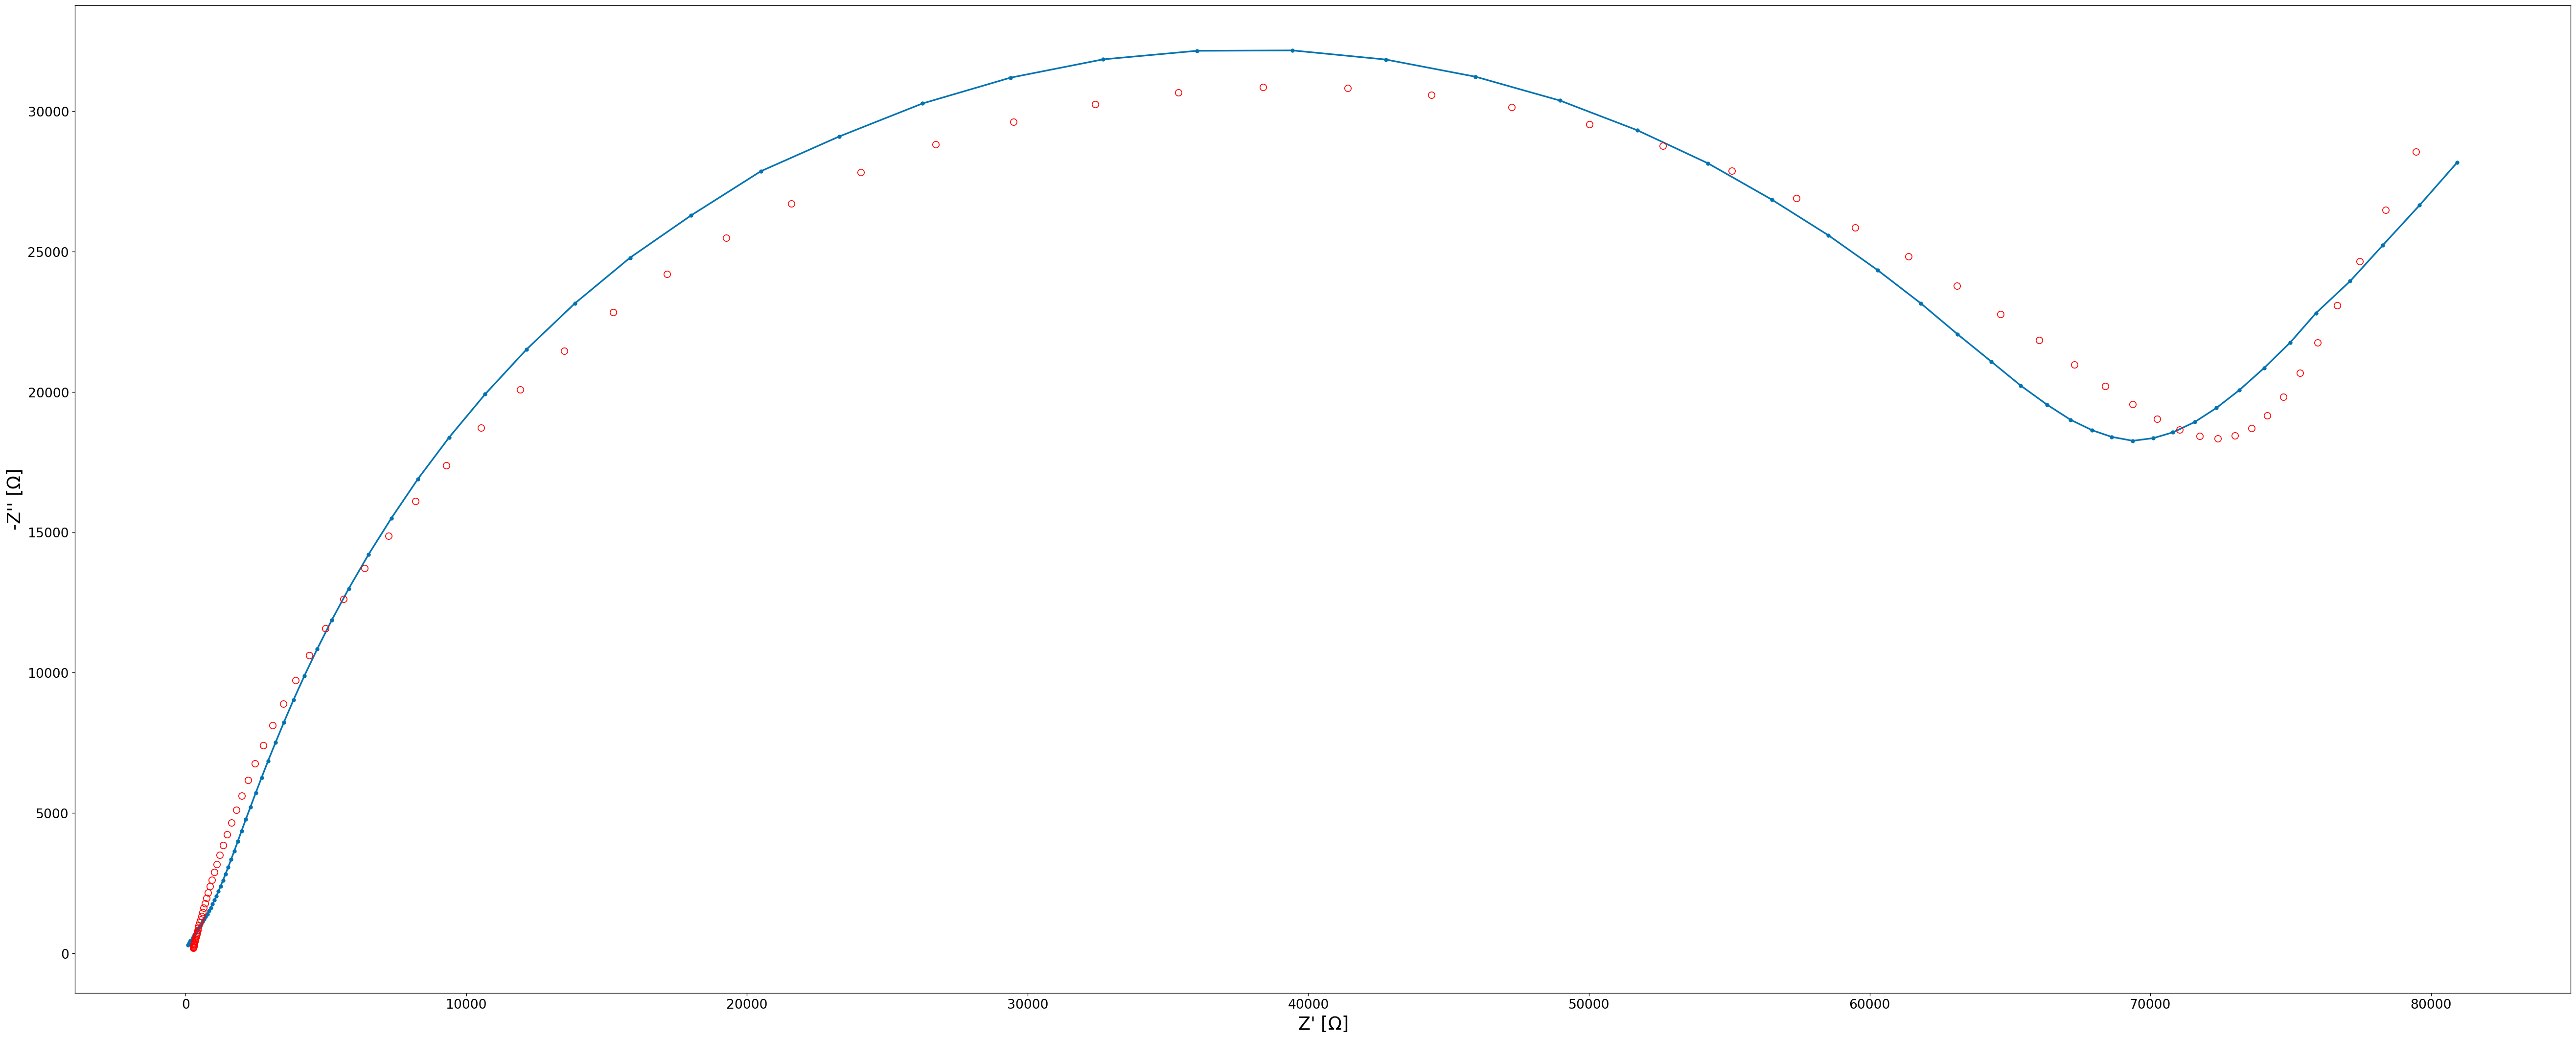

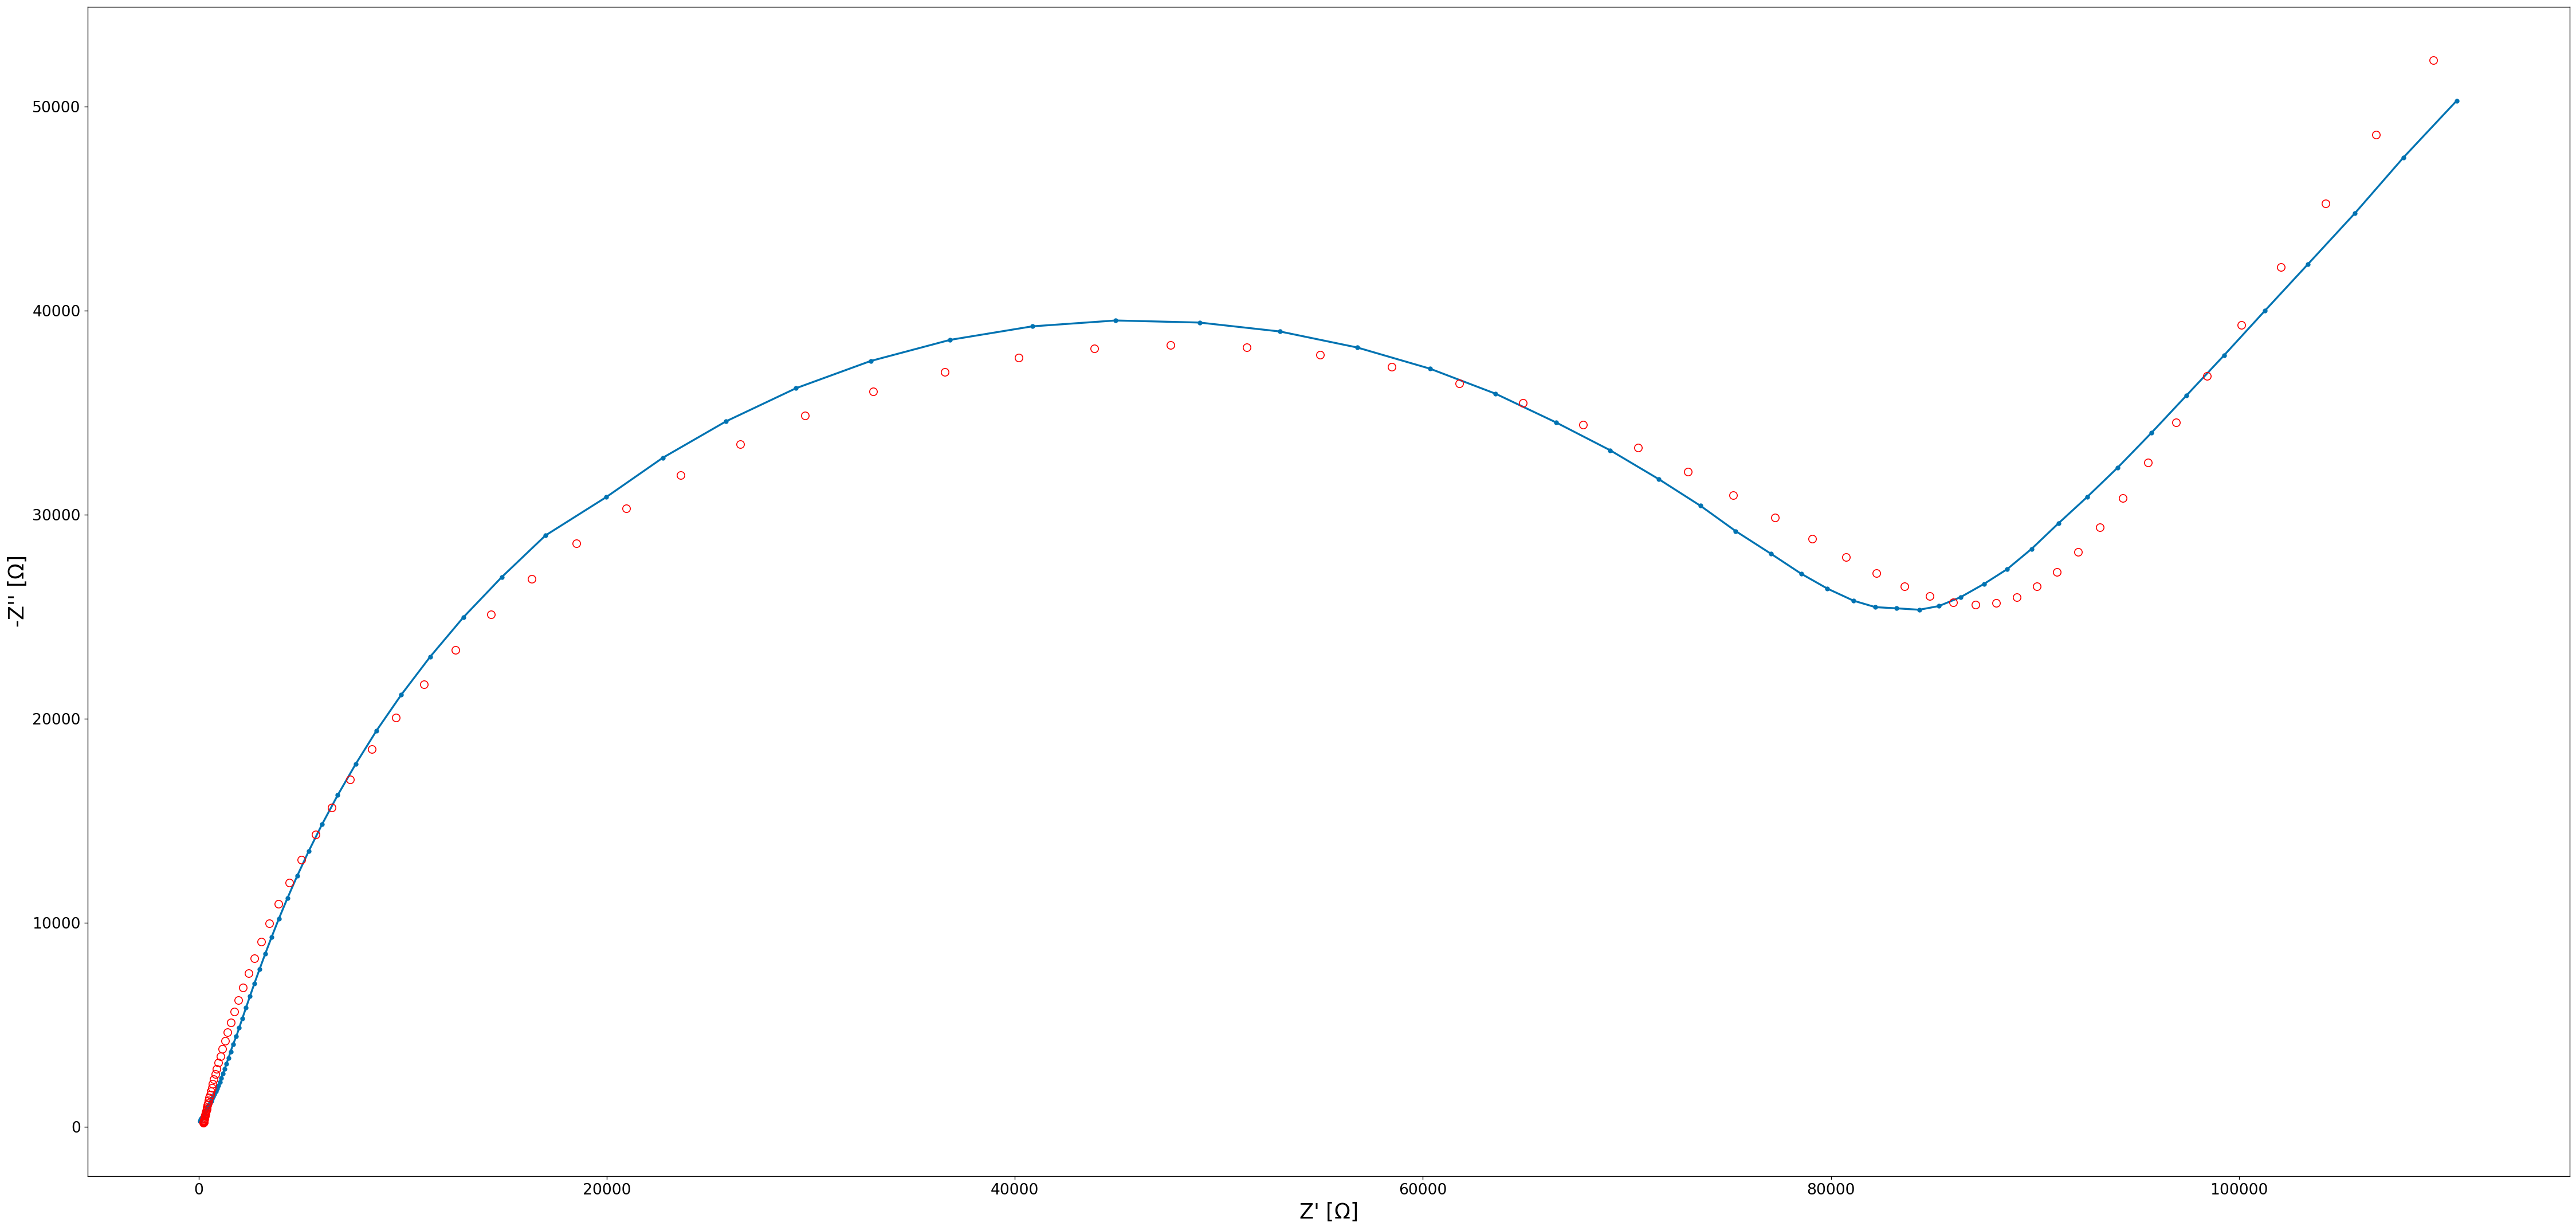

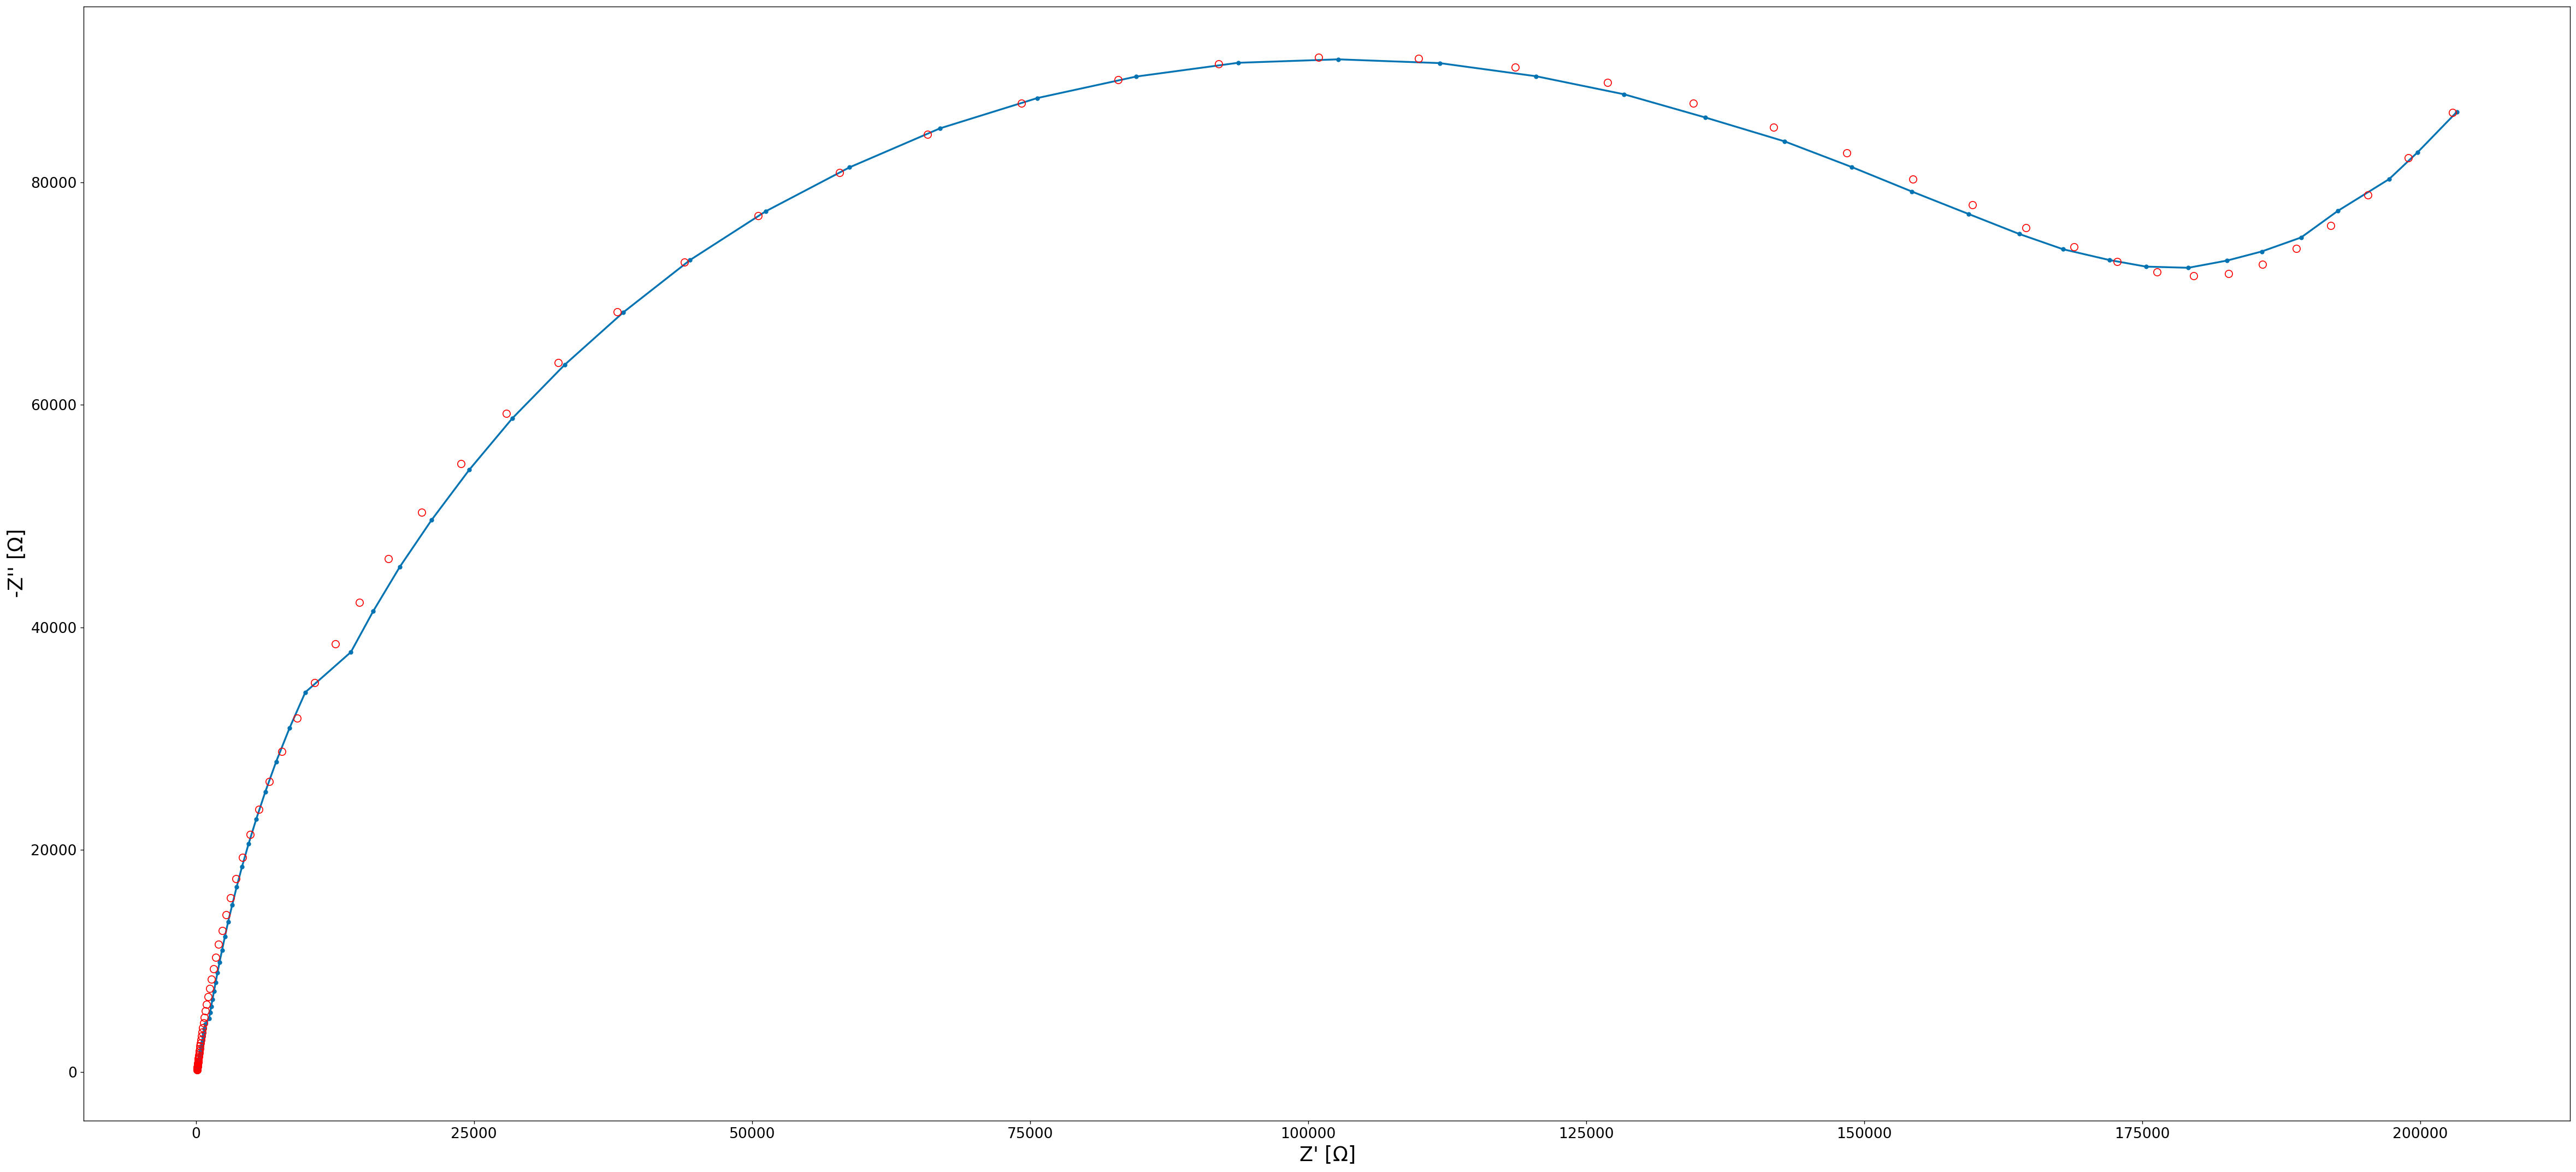

In [17]:
auto_fit(path, good_graphs)